### **Packages to install**

In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install opencv-python # for cv2
# !pip install torch # for pytorch
# !pip install torchvision
# !pip install scikit-learn # for sklearn
# !pip install tqdm
# !pip install plotly # for visualisation
# !pip install matplotlib
# !pip install ipympl # for matplotlib_inline


### **Aims and Objectives**

#### **Problem Statement**


The goal of this project is to develop several models capable of classifying facial photographs into one of five predefined hair categories based on length and color. This classification is essential for various applications, such as automated indexing of photographs, content filtering, and personalized recommendation systems in the media and entertainment industry

The five(5) categories;

1. Bald hair: Images featuring individuals with a bald head, regardless of gender or race. Examples shown below:
  - <img src='https://drive.google.com/uc?id=1gjA5Ky-itRnfK6kHOSsPHNw-3GcsH_wn' width='150'>    <img src='https://drive.google.com/uc?id=1B9jgtJjfSvtbjGVJwJ5EK2zcgM_LOhaL' width='150'>

2. Long Black Hair: Images where the individual's hair is black and touches their shoulders, regardless of gender or race. Examples shown below
  - <img src='https://drive.google.com/uc?id=1py5WEdPyqqlsElOt0YaDd1zB7MFdo6uV' width='150'>  <<img src='https://drive.google.com/uc?id=1Ocy-bkokWr1JWgX2ihVtmt7ebu0Hyd9f' width='150'>

3. Long White Hair: Images where the individual's hair is white and touches their shoulders, regardless of gender or race. Examples shown below:
  - <img src='https://drive.google.com/uc?id=1e1lgaGmAhgSkgDvf-Joa5zoqLxm41KIA' width='150'>   <img src='https://drive.google.com/uc?id=1It11njab7Hjz2867ZC18S7iKL820hXaG' width='150'>
4. Short Black Hair: Images where the individual's hair is black and does not extend beyond their earlobes, regardless of gender or race. Examples shown below:
  - <img src='https://drive.google.com/uc?id=1JWbX54Wp9t6qM7rJYt20YUGOZpVcoiev' width='150'> <img src='https://drive.google.com/uc?id=1k_s2F0nbvoHVUDC0LJb8nK63zcJa99Tr' width='150'>
5. Short White Hair: Images where the individual's hair is white and does not extend beyond their earlobes, regardless of gender or race. Examples shown below:
  - <img src='https://drive.google.com/uc?id=1aW4rzyBKDisLn4avYlQdz0u2kHE6Z0Zd' width='150'>  <img src='https://drive.google.com/uc?id=1K9O3X-GpDZd6GeR_Xhl0QdWIA2bnoxLy' width='150'>

**Dataset**

- The dataset for this project is sourced from the [CelebA Dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) (Liu et al. 2015).

**Limitations**

- The classification is limited to the selected five categories to ensure feasibility within the constraints of time and computational resources.
- The model does not account for other hair styles, such as braids, ponytails, or unique cultural hairstyles, which could be explored in future work.

#### **Aims and Objectives**

The main aim of this project is to develop several computer vision models that can classify a facial image into one of the five identified classes.

The following measurable objectives have been identified:
1.	Collection and preprocessing of dataset of facial images
2.	Build and train the models to classify images the 5 classes we have identified, the models are (ANN, CNN, CNN with KNN, CNN with SVM, OpenCV with CNN)
3. Evaluate and perform Error analysis on each of the trained models
4.	Compare the performance of the trained models against a benchmark and also determine the model that performed best out of the 5 models
5. Test the final model accuracy using a final test set

Achieving these objectives will contribute to the growing field of computer vision and establish a framework for developing more advanced models capable of handling complex tasks.

## **Data acquisition and preparation**

#### **Import Libraries**

In [ ]:
## import libraries

import pandas as pd
import numpy as np
import os
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import copy
import random
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split

# for importing data
import torchvision

# for computing training time
import time
from tqdm.notebook import tqdm

# for visualisation
import plotly.subplots as sp
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')


#### Define device to use

In [ ]:
# use GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#### **Dataset Discussion**

The main source of data for facial images was the CelebFaces Attributes (CelebA) dataset, accessible via this [link](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html).

The CelebA dataset is a large-scale face attributes dataset consisting of over 200,000 celebrity images with dimensions of 218 x 178 pixels (Liu et al., 2015). Although each image is annotated with 40 binary attribute labels, such as gender, facial hair, and eyeglasses, these annotations were not relevant for this task. Manual curation of the dataset was performed to identify images that fit into the five defined classes.

After searching through the CelebA dataset, all faces belonging to each of the five classes were organized into separate folders, with each folder representing one of the classes:

1. Bald
2. Long Black Hair
3. Long White Hair
4. Short Black Hair
5. Short White Hair


These folders have been zipped and uploaded to Dropbox, and can be accessed [here](https://www.dropbox.com/s/cbwwf9dwxvggi75/CelebA%20extracted1.zip?dl=0)



#### **Import and Anotate the dataset**

- First, download the zipped file containing the five folders representing the five classes, and then unzip it.

- Next, annotate the images by sorting images from the dataset organized into folders, where each folder represents a different class. Below is a breakdown of the process:

1. Initialize empty lists to store images and their corresponding labels.
2. List and sort the folders in the dataset path.
3. Loop through each sorted folder, assigning a label to the images inside based on the folder index.
4. For each class folder, list and sort the image files.
5. Loop through each sorted image file.
6. Create the full path to the current image file.
7. Read the image from the image path using OpenCV's `cv2.imread` function.
8. Resize the image to a new dimension (89x109)
9. Append the preprocessed image and corresponding labels to the `images` and `labels` list.

Inspiration for this method was gotten from a tutorial from this web [link](https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/) (Huilgol 2020).

In [ ]:
## Download and extract the images folder

!wget -O CelebA_extracted.zip https://dl.dropboxusercontent.com/s/cbwwf9dwxvggi75/CelebA%20extracted1.zip
!unzip CelebA_extracted.zip

In [ ]:
dataset_path ='/content/CelebA extracted1'

In [ ]:
# Initialize empty lists to store images and their corresponding labels
images = []
labels = []

# List the folders in the dataset_path and sort them
sorted_folders = sorted(os.listdir(dataset_path))

# Loop through each sorted folder, assigning a label to the images inside
for label, class_folder in tqdm(enumerate(sorted_folders), total=len(sorted_folders), desc="Loading Folders"):
    # Create the full path to the current class_folder
    class_folder_path = os.path.join(dataset_path, class_folder)

    # List the image files in the current class_folder and sort them
    image_files = os.listdir(class_folder_path)
    sorted_image_files = sorted(image_files)

    # Loop through each sorted image file
    for image_file in tqdm(sorted_image_files, total=len(sorted_image_files), desc="Loading Images"):
        # Create the full path to the current image_file
        image_path = os.path.join(class_folder_path, image_file)
        # Read the image from the image_path
        image = cv2.imread(image_path)

        # Resize and preprocess the image
        image = cv2.resize(image, (89, 109))

        # Append the preprocessed image to the images list
        images.append(image)
        # Append the corresponding label to the labels list
        labels.append(label)


Loading Folders:   0%|          | 0/5 [00:00<?, ?it/s]

Loading Images:   0%|          | 0/1183 [00:00<?, ?it/s]

Loading Images:   0%|          | 0/2070 [00:00<?, ?it/s]

Loading Images:   0%|          | 0/1959 [00:00<?, ?it/s]

Loading Images:   0%|          | 0/1995 [00:00<?, ?it/s]

Loading Images:   0%|          | 0/1911 [00:00<?, ?it/s]

In [ ]:
images[1].shape

(109, 89, 3)

In [ ]:
# Convert the images and labels list to numpy arrays

images_array = np.array(images)
labels_array = np.array(labels)


In [ ]:
images_array.shape

(9118, 109, 89, 3)

#### **Creating the class category name for the faces**

In [ ]:
## Create a dictionary mapping numeric labels to class names

faceCategories = {0: 'Bald', 1: 'Long Black Hair', 2: 'Long White Hair', 3: 'Short Black Hair', 4: 'Short White Hair'}

#### **Checking the sample size per class**

The code below displays the sample size per class using plotly library. Inspiration for plotting this with plotly was gotten from this tutorials [link1](https://plotly.com/python/bar-charts/) , [link2](https://plotly.com/python/creating-and-updating-figures/) , [link3](https://plotly.com/python/) (Plotly Python Bar Charts, n.d.)

In [ ]:
# Calculate the count of each label class
unique_labels, counts = np.unique(labels_array, return_counts=True)
label_counts = dict(zip(unique_labels, counts))

# Create a figure
fig = go.Figure()

# Add a bar trace for the label counts
fig.add_trace(go.Bar(x=[faceCategories[key] for key in label_counts.keys()], y=list(label_counts.values())))

# Design the layout of the figure
fig.update_layout(
    xaxis_title='Label Class',
    yaxis_title='Frequency',
    xaxis=dict(tickmode='linear', tick0=0, dtick=1),
    yaxis=dict(range=[200, 2200]),
    title='Total samples per Class'
)

# Display the figure
fig.show()


#### **Funtion that displays images**

The function below displays images wether flattened or not, it takes in input images_data, the labels, number of images to display and the fig size

In [ ]:
def display_images(images_data, labels, num_images_to_display=5, fig_size=(15, 14)):
    fig, axes = plt.subplots(1, num_images_to_display, figsize=fig_size)

    for ax in axes:
        # Pick a random index
        random_index = np.random.randint(images_data.shape[0])

        # Check if the input images are flattened and normalized
        if images_data.ndim == 2:
            # Reshape and convert the flattened and normalized image back to its original form
            image = np.reshape(images_data[random_index, :], (109, 89, 3)) * 255
            image = image.astype(np.uint8)
        else:
            # Use the original image data
            image = images_data[random_index]

        # Convert the image to RGB and get its target class
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        face = faceCategories[labels[random_index]]

        # Visualize the image and its class name
        ax.imshow(image_rgb)
        ax.set_title(f"{face}")
        ax.axis('off')

    plt.show()


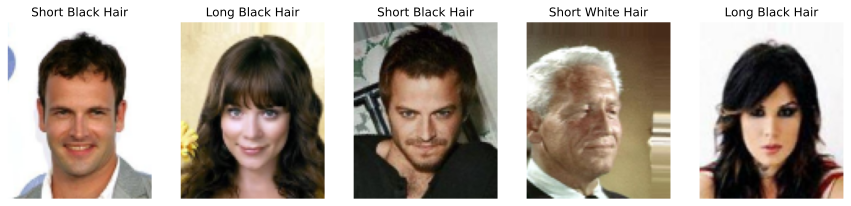

In [ ]:
# visualize some images
display_images(images_array, labels_array, num_images_to_display=5, fig_size=(15, 14))

#### **Flattening the Images**

The images were flattened to prepare them for the first model: Artificial Neural Network (ANN).

In [ ]:
# Flattening the images

flattened_images_array = images_array.reshape(images_array.shape[0], -1)

print("Flattened images array shape:", flattened_images_array.shape)


Flattened images array shape: (9118, 29103)


#### **Normalize the data**

First check the ranges of the pixel values of the images

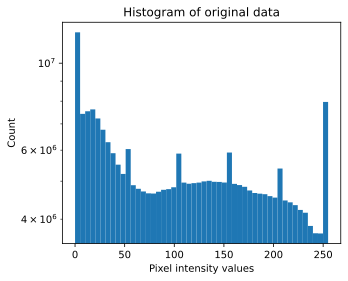

In [ ]:
# show histogram of pixel values of the original images to check if we need to normalise
fig1, ax1 = plt.subplots(figsize=(5,4))
ax1.hist(flattened_images_array.flatten(), 50)
ax1.set_xlabel('Pixel intensity values')
ax1.set_ylabel('Count')
ax1.set_title('Histogram of original data')
ax1.set_yscale('log')
plt.show()

The pixel values range from 0 to 255 as seen above, requiring normalization to a range of 0 to 1. This normalization helps stabilize training and improves training speed. Min-max scaling was used to achieve this normalization by subtracting the lowest pixel value (0) from each pixel and dividing by the highest value (255).

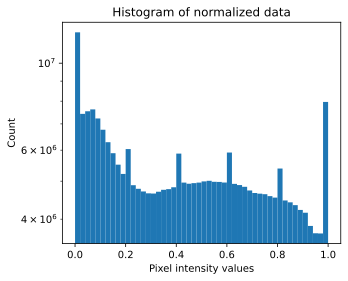

In [ ]:
# Normalize the pixel values to a range of 0 - 1
dataNorm = flattened_images_array / np.max(flattened_images_array)

# Show histogram of normalized data
fig2, ax2 = plt.subplots(figsize=(5,4))
ax2.hist(dataNorm.flatten(), 50)
ax2.set_xlabel('Pixel intensity values')
ax2.set_ylabel('Count')
ax2.set_title('Histogram of normalized data')
ax2.set_yscale('log')
plt.show()

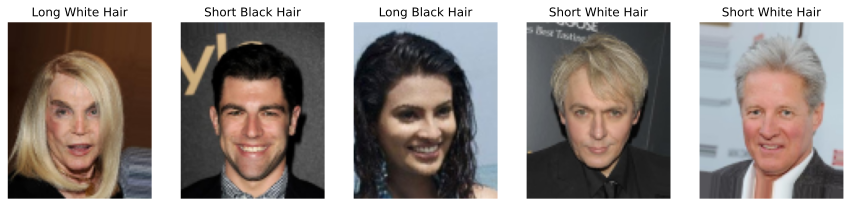

In [ ]:
# visualize some images
display_images(images_array, labels_array, num_images_to_display=5, fig_size=(15, 14))

## **Modelling**

### **Applying Artificial Neural Network (ANN)**

The classification task begins by applying Artificial Neural Networks (ANNs) to the dataset. ANNs, also known as the Feed Forward Method, are computing neural networks inspired by the biological neural networks of the human brain. They form the backbone of artificial intelligence (AI) and possess the ability to learn and improve from experience, similar to human learning. ANNs are used to solve complex problems, such as classification tasks, that would be challenging or impossible for traditional computational methods (Raschka et al., 2022).

Further preprocessing is performed on the data to prepare it for the ANN model.

#### Splitting the Dataset and Creating a Dataloader Object

**Summary of process here**
- The dataset was converted into a tensor, including both flattened images and labels.
- Then split the dataset into Train, validation and test sets using 80:10:10 ratio. We achieved this by first splitting the data into train(80), and tmptest(20), then further split the temptest into val(10%) and test(10%)
  - The intention is to train the model with the train sets, while developing and validating the model with the validation sets through hyperparameter optimisation. Then the final accuracy of the best model out of the 5 models would be evaluated using the test set
  - A random state was used for the splitting process to ensure consistent train, test, and validation sets across all models. This ensures that all models are trained and evaluated on the same datasets, creating a level playing field.
- The split was then converted into a PyTorch dataset
- Finally, the datasets were passed into a dataloader:
  - A batch size of 32 was used for the train loader.
  - The test size was used as the batch size for the test loader, and the validation size was used as the batch size for the validation loader, resulting in both test_loader and val_loader having a single batch.

In [ ]:
# Step 1: convert to tensor
dataT   = torch.tensor( dataNorm ).float()
labelsT = torch.tensor( labels_array ).long() # long = int64

# Step 2: split the data into (80:20)
train_data,testTMP_data, train_labels,testTMP_labels = train_test_split(dataT, labelsT, test_size=.2, shuffle = True, random_state = 100)

# Step 3: Further split the 20% into 50:50 for validation and test
val_data,test_data, val_labels,test_labels = train_test_split(testTMP_data, testTMP_labels, test_size=.5, shuffle = True, random_state = 100)

# Step 4: convert into PyTorch Datasets
train_data = TensorDataset(train_data, train_labels)
val_data = TensorDataset(val_data, val_labels)
test_data  = TensorDataset(test_data, test_labels)

# Setting random seed for Dataloader
torch.manual_seed(100)

# Step 5: translate into dataloader objects
batchsize    = 32
train_loaderANN = DataLoader(train_data, batch_size = batchsize, shuffle=True, drop_last=True)
val_loaderANN = DataLoader(val_data, batch_size = val_data.tensors[0].shape[0])
test_loaderANN  = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])

In [ ]:
# We check sizes here to be sure everything above was done correctly
print( train_loaderANN.dataset.tensors[0].shape )
print( val_loaderANN.dataset.tensors[0].shape )
print( test_loaderANN.dataset.tensors[0].shape )

print(' ')

print( train_loaderANN.dataset.tensors[1].shape )
print( val_loaderANN.dataset.tensors[1].shape )
print( test_loaderANN.dataset.tensors[1].shape )

torch.Size([7294, 29103])
torch.Size([912, 29103])
torch.Size([912, 29103])
 
torch.Size([7294])
torch.Size([912])
torch.Size([912])


#### **The ANN model**

##### function that creates the model

Defining the Custom ANN Model

- A random seed was set to ensure consistent weight initialization whenever the model is rerun.
- The first two hidden layers were defined.
- Cross-entropy loss was used since this is a classification task.
- The AdamW optimizer, a state-of-the-art optimization algorithm, was employed.

In [ ]:
# Setting random seed for PyTorch and NumPy
torch.manual_seed(90)
np.random.seed(90)

# create a class for the model
def TheANN0net():

  class ANNnet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(29103,30)

      ### hidden layers
      self.fc1 = nn.Linear(30,20)
      self.fc2 = nn.Linear(20,10)

      ### output layer
      self.output = nn.Linear(10,5)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return self.output(x)

  # create the model instance
  net = ANNnet()

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.AdamW(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [ ]:
# test the model with one batch to check the model is properly created
net,lossfun,optimizer = TheANN0net()

X,y = next(iter(train_loaderANN))
yHat = net(X)

# Compute the loss to see if everything is intact
loss = lossfun(yHat,y)
print(' ')
print('Loss:')
print(loss)

 
Loss:
tensor(1.6511, grad_fn=<NllLossBackward0>)


##### Function that trains the model

This is a function that trains a model, would be used in the other models developed

In [ ]:
def trainTheModel(net,lossfun,optimizer,numepochs,train_loader,val_loader):

  # send the model to the GPU
  net.to(device)

  # initialize losses
  trainLoss = torch.zeros(numepochs)
  valLoss  = torch.zeros(numepochs)
  trainAcc  = torch.zeros(numepochs)
  valAcc   = torch.zeros(numepochs)

  # loop over epochs
  for epochi in tqdm(range(numepochs), desc='Epochs'):

    # loop over training data batches
    net.train() # switch to train mode
    batchLoss = []
    batchAcc  = []

    for X,y in tqdm(train_loader, desc='Train Batches', leave=False):

      # push data to GPU
      X = X.to(device)
      y = y.to(device)

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss and accuracy from this batch
      batchLoss.append(loss.item())
      batchAcc.append( torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
    # end of batch loop...

    # and get average losses and accuracies across the batches
    trainLoss[epochi] = np.mean(batchLoss)
    trainAcc[epochi]  = 100*np.mean(batchAcc)

    #### test performance (here done in batches!)
    net.eval() # switch to test mode
    batchLoss = []
    batchAcc  = []

    for X,y in tqdm(val_loader, desc='Val Batches', leave=False):

      # push data to GPU
      X = X.to(device)
      y = y.to(device)

      # forward pass and loss
      with torch.no_grad():
        yHat = net(X)
        loss = lossfun(yHat,y)

      # loss and accuracy from this batch
      batchLoss.append(loss.item())
      batchAcc.append( torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
    # end of batch loop...

    # and get average losses and accuracies across the batches
    valLoss[epochi] = np.mean(batchLoss)
    valAcc[epochi]  = 100*np.mean(batchAcc)

  # end epochs

  # function output
  return trainLoss,valLoss,trainAcc,valAcc,net

##### Function that vissualise the results

This function displays the curve for losses and accuracy, will be further used in CNN section when displaying the losses. Inspiration is from plotly

In [ ]:
def plot_results(trainLoss, valLoss, trainAcc, valAcc, caption="Figure 15:"):
    # Create subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Model loss", "Model accuracy"))

    # Add traces for losses
    fig.add_trace(go.Scatter(x=list(range(len(trainLoss))), y=trainLoss, mode='lines', name='Train Loss'), row=1, col=1)
    fig.add_trace(go.Scatter(x=list(range(len(valLoss))), y=valLoss, mode='lines', name='Validation Loss'), row=1, col=1)

    # Add traces for accuracies
    fig.add_trace(go.Scatter(x=list(range(len(trainAcc))), y=trainAcc, mode='lines', name='Train Accuracy'), row=1, col=2)
    fig.add_trace(go.Scatter(x=list(range(len(valAcc))), y=valAcc, mode='lines', name='Validation Accuracy'), row=1, col=2)

    # Update y-axis labels and range
    fig.update_yaxes(title_text="Loss", row=1, col=1)
    fig.update_yaxes(title_text="Accuracy (%)", range=[10, 100], row=1, col=2)

    # Padding so there's horizontal space before start and end of curve
    num_epochs = len(trainLoss)
    padding_percentage = 0.05
    padding = int(padding_percentage * num_epochs)
    new_x_range = [-padding, num_epochs + padding]

    # Update x-axis labels and range
    fig.update_xaxes(title_text="Epochs", range=new_x_range, row=1, col=1)
    fig.update_xaxes(title_text="Epochs", range=new_x_range, row=1, col=2)

    # Update layout and show the plot
    fig.update_layout(title_text=f'Final model validation accuracy: {valAcc[-1]:.2f}%',showlegend=True,width=1000,height=400,
                      annotations=[dict(text=caption,xref='paper',yref='paper',x=0.5,y=-0.3,showarrow=False,font=dict(size=14))])
    fig.show()

##### Train the model and vissualise the results

- A seed was set to ensure reproducibility of results.

- The `train_loaderANN`, `val_loaderANN`, and the outputs of `TheANN0net()` defined earlier were passed into the **`trainTheModel`** function defined in this section. The number of epochs was specified, and the model was trained


In [ ]:
# setting seed for reproducibility of results
np.random.seed(100)
torch.manual_seed(100)
random.seed(100)

# train
trainLossANN0, valLossANN0, trainAccANN0, valAccANN0, netANN0 = trainTheModel(
    *TheANN0net(),
    numepochs=30,
    train_loader=train_loaderANN,
    val_loader=val_loaderANN,
)


Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# show the loss and accuracy
plot_results(trainLossANN0,valLossANN0,trainAccANN0,valAccANN0, caption="Loss and Accuracy")

#### **Hyperparameter Optimization**

From the curve above, it is observed that the model appears to be on the verge of overfitting. To address this, the same function was used, but a dropout was added to the second hidden layer to mitigate overfitting.

##### function that creates the model

In [ ]:
# Setting random seed for PyTorch and NumPy
torch.manual_seed(90)
np.random.seed(90)

# create a class for the model
def TheANN1net():

  class ANNnet(nn.Module):
    def __init__(self):
      super().__init__()

      ## input layer
      self.input = nn.Linear(29103,30)

      ## hidden layer
      self.fc1 = nn.Linear(30,20)
      self.fc2 = nn.Linear(20,10)

      ## output layer
      self.output = nn.Linear(10,5)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      x = F.dropout(x, p=.5, training = self.training)                      ## dropout
      return self.output(x)

  # create the model instance
  net = ANNnet()

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.AdamW(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [ ]:
# test the model with one batch
net,lossfun,optimizer = TheANN1net()

X,y = next(iter(train_loaderANN))
yHat = net(X)

# Compute the loss to see if everything is intact
loss = lossfun(yHat,y)
print(' ')
print('Loss:')
print(loss)

 
Loss:
tensor(1.6556, grad_fn=<NllLossBackward0>)


##### Train the model and visualise the results

- A seed was set to ensure reproducibility of results.

- The `train_loaderANN`, `val_loaderANN`, and the outputs of `TheANN1net()` defined earlier were passed into the **`trainTheModel`** function defined in this section. The number of epochs was specified, and the model was trained


In [ ]:
# set seed
np.random.seed(90)
torch.manual_seed(90)
random.seed(90)

# train
trainLossANN1, valLossANN1, trainAccANN1, valAccANN1, netANN1 = trainTheModel(
    *TheANN1net(),
    numepochs=30,
    train_loader=train_loaderANN,
    val_loader=val_loaderANN,
)


Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Show the losses and accuracies
plot_results(trainLossANN1,valLossANN1,trainAccANN1,valAccANN1, caption="Loss and Accuracy")

From the above curve it can see that the loss curve  looks much better even though it's still not ideal. And yes this model can still be optimised further.

### **Applying Convolution Neural Network**

#### Splitting the Dataset and Creating a Dataloader Object

**Summary of Process Here**  

- The flattened **`dataNorm`** was first reshaped into a 4-dimensional tensor (batch size, channel, height, and width) to enable compatibility with a convolutional layer.  

- After reshaping, the dataset was split into train, validation, and test sets again, using the same random state for consistency.  

- The remaining process followed the same steps as those used for splitting the dataset and creating a dataloader object in the Artificial Neural Network section.  

In [ ]:
# Step 1: transform dataNorm to 4D tensor and labels to tensor
data4dT   = torch.tensor( dataNorm ).float().view(-1, 3, 109, 89)
labelsT = torch.tensor( labels_array ).long()  # long = int64

# Step 2: split the data into (80:20)
train_data,testTMP_data, train_labels,testTMP_labels = train_test_split(data4dT, labelsT, test_size=.2, shuffle = True, random_state = 100)

# Step 3: Further split the 20% into 50:50 for validation and test
val_data,test_data, val_labels,test_labels = train_test_split(testTMP_data, testTMP_labels, test_size=.5, shuffle = True, random_state = 100)

# Step 4: convert into PyTorch Datasets
train_data = TensorDataset(train_data, train_labels)
val_data = TensorDataset(val_data, val_labels)
test_data  = TensorDataset(test_data, test_labels)

# Setting random seed for Dataloader
# (we set a random seed to ensure the arrangement of batches is consistent)
torch.manual_seed(100)

# Step 5: translate into dataloader objects
batchsize    = 32
train_loaderCNN = DataLoader(train_data, batch_size = batchsize, shuffle=True, drop_last=True)
val_loaderCNN = DataLoader(val_data, batch_size = val_data.tensors[0].shape[0])
test_loaderCNN  = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])

In [ ]:
# We check sizes here to ensure the split was done correctly
print( train_loaderCNN.dataset.tensors[0].shape )
print( val_loaderCNN.dataset.tensors[0].shape )
print( test_loaderCNN.dataset.tensors[0].shape )

print(' ')

print( train_loaderCNN.dataset.tensors[1].shape )
print( val_loaderCNN.dataset.tensors[1].shape )
print( test_loaderCNN.dataset.tensors[1].shape )

torch.Size([7294, 3, 109, 89])
torch.Size([912, 3, 109, 89])
torch.Size([912, 3, 109, 89])
 
torch.Size([7294])
torch.Size([912])
torch.Size([912])


#### **Custom Convolution Neural Network (CNN)**

##### function that creates the custom CNN model

**Defining the Custom CNN Model**  

- The model consists of three convolutional layers followed by three fully connected (linear) layers.  
- Each convolutional layer applies a set of filters to the input, enabling the model to learn spatial patterns within the data.  
- The convolutional layers use kernels of size 3x3, a stride of 1 (moving one pixel at a time), and a padding of 1.  
- The first convolutional layer has 20 filters, followed by a pooling operation.  
- The second convolutional layer has 30 filters, with pooling also applied.  
- The third convolutional layer has 40 filters and is followed by an adaptive average pooling operation, which specifies the output size as 10x10. Adaptive average pooling ensures that input image size does not affect the fixed 10x10 output.  
- The output of the convolutional layers is flattened before being passed to the linear layers.  
- The linear layers perform the classification tasks.  
- The cross-entropy loss function is used, and the AdamW optimizer is applied with a learning rate of 0.001.  

In [ ]:
# Setting the random seed for PyTorch and NumPy
torch.manual_seed(90)
np.random.seed(90)

# create a class for the model
def TheCNN0net():

  class customCNNnet(nn.Module):
    def __init__(self):
      super().__init__()

      ## convolution layers
      self.conv1 = nn.Conv2d(3,20,kernel_size=3,stride=1,padding=1)
      self.conv2 = nn.Conv2d(20,30,kernel_size=3,stride=1,padding=1)
      self.conv3 = nn.Conv2d(30,40,kernel_size=3,stride=1,padding=1)

      ## linear layers
      self.fc1 = nn.Linear(10*10*40,40)
      self.fc2 = nn.Linear(40,50)
      self.fc3 = nn.Linear(50,5)

    # forward pass
    def forward(self,x):

      # convolution block 1
      x = F.max_pool2d(self.conv1(x),2)
      x = F.relu(x)

      # convolution block 2
      x = F.max_pool2d(self.conv2(x),2)
      x = F.relu(x)

      # convolution block 3
      x = F.adaptive_avg_pool2d(self.conv3(x),output_size=(10, 10))
      x = F.relu(x)

      # flatten to 2d for linear layer
      nUnits = x.shape.numel()/x.shape[0]
      x = x.view(-1,int(nUnits))

      # linear layers
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)


      return x

  # create the model instance
  net = customCNNnet()

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.AdamW(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [ ]:
# Sanity check: test the model with one batch
net,lossfun,optimizer = TheCNN0net()

X,y = next(iter(train_loaderCNN))
yHat = net(X)

# Compute the loss to check if everything is intact
loss = lossfun(yHat,y)
print('Shape:')
print(X.shape)
print(' ')
print('Loss:')
print(loss)

Shape:
torch.Size([32, 3, 109, 89])
 
Loss:
tensor(1.5848, grad_fn=<NllLossBackward0>)


##### Train the model and show the results

- A seed was set to ensure reproducibility of results.  

- The `train_loaderCNN`, `val_loaderCNN`, and the outputs of `TheCNN0net()` defined earlier were passed into the **`trainTheModel`** function defined in the ANN section. The number of epochs was specified, and the model was trained.  

In [ ]:
# set seed
np.random.seed(100)
torch.manual_seed(100)
random.seed(100)

# train
trainLossCNN0, valLossCNN0, trainAccCNN0, valAccCNN0, netCNN0 = trainTheModel(
    *TheCNN0net(),
    numepochs=30,
    train_loader=train_loaderCNN,
    val_loader=val_loaderCNN,
)


Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Show the losses and accuracies
plot_results(trainLossCNN0,valLossCNN0,trainAccCNN0,valAccCNN0, caption="Loss and Accuracy")

#### **Hyperparameter Optimization**

From the loss curve above, the model appears to be overfitting, with signs of learning noise starting around the 18th epoch. To address this, dropout was added to the convolutional and linear layers to reduce overfitting.

Dropout is a simple yet effective technique that encourages units to learn independently, preventing reliance on any particular unit. According to Nitish et al. (2014), adding dropout significantly helps in preventing neural networks from overfitting.

##### function that creates the custom CNN model

In [ ]:
# Setting random seed for PyTorch and NumPy
torch.manual_seed(90)
np.random.seed(90)

# create a class for the model
def TheCNN1net():

  class customCNNnet(nn.Module):
    def __init__(self):
      super().__init__()

      ## convolution layers
      self.conv1 = nn.Conv2d(3,20,kernel_size=3,stride=1,padding=1)
      self.conv2 = nn.Conv2d(20,30,kernel_size=3,stride=1,padding=1)
      self.conv3 = nn.Conv2d(30,40,kernel_size=3,stride=1,padding=1)

      ## linear layers
      self.fc1 = nn.Linear(10*10*40,40)
      self.fc2 = nn.Linear(40,50)
      self.fc3 = nn.Linear(50,5)

    # forward pass
    def forward(self,x):

      # convolution block 1
      x = F.max_pool2d(self.conv1(x),2)
      x = F.relu(x)
      x = F.dropout(x,p=.25,training=self.training)                                ## dropout

      # convolution block 2
      x = F.max_pool2d(self.conv2(x),2)
      x = F.relu(x)
      x = F.dropout(x,p=.25,training=self.training)                                ## dropout

      # convolution block 3
      x = F.adaptive_avg_pool2d(self.conv3(x),output_size=(10, 10))
      x = F.relu(x)
      x = F.dropout(x,p=.25,training=self.training)                                ## dropout

      # flatten to 2d for linear layer
      nUnits = x.shape.numel()/x.shape[0]
      x = x.view(-1,int(nUnits))

      # linear layers
      x = F.relu(self.fc1(x))
      x = F.dropout(x,p=.5,training=self.training)                                 ## dropout
      x = F.relu(self.fc2(x))
      x = F.dropout(x,p=.5,training=self.training)                                 ## dropout
      x = self.fc3(x)


      return x

  # create the model instance
  net = customCNNnet()

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.AdamW(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [ ]:
# Sanity check: test the model with one batch
net,lossfun,optimizer = TheCNN1net()

X,y = next(iter(train_loaderCNN))
yHat = net(X)

# Compute the loss to check if everything is intact
loss = lossfun(yHat,y)
print('Shape:')
print(X.shape)
print(' ')
print('Loss:')
print(loss)

Shape:
torch.Size([32, 3, 109, 89])
 
Loss:
tensor(1.5841, grad_fn=<NllLossBackward0>)


##### Train the model and show the results

- A seed was set to ensure reproducibility of results.  

- The `train_loaderCNN`, `val_loaderCNN`, and the outputs of `TheCNN1net()` defined earlier were passed into the **`trainTheModel`** function defined in the ANN section. The number of epochs was specified, and the model was trained.  

In [ ]:
# set seed
np.random.seed(100)
torch.manual_seed(100)
random.seed(100)

# train
trainLossCNN1, valLossCNN1, trainAccCNN1, valAccCNN1, netCNN1 = trainTheModel(
    *TheCNN1net(),
    numepochs=30,
    train_loader=train_loaderCNN,
    val_loader=val_loaderCNN,
)


Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Show the losses and accuracies
plot_results(trainLossCNN1,valLossCNN1,trainAccCNN1,valAccCNN1, caption="Loss and Accuracy")

This model is expected to perform better on unseen data compared to the previous model, as it does not overfit, as indicated by the loss curve. However, further improvements to the model are still possible.

An experiment was also conducted using a pretrained network, such as ResNet18, to compare its performance with the custom model. Details of this experiment can be found in the appendix section.

### **Applying CNN with KNN and SVM**

**CNN as a Feature Extractor**  

CNNs have consistently demonstrated exceptional performance in feature extraction due to their ability to hierarchically learn patterns from input data at each layer (Varshni et al., 2019; Wang et al., 2022).  

A common approach to using CNNs as feature extractors involves removing the final fully connected layer(s), typically used for classification, and feeding the output of the remaining convolutional layers into a different machine learning model. This effectively transforms the CNN into a feature engineering tool.  

This approach is an example of transfer learning, which leverages learned features or weights for a different task, often with limited data availability (Ayyadevara and Reddy, 2020).  

In this project, the feature extraction capability of CNNs is explored by using them to extract features from images, followed by classification using SVM and KNN.  

#### function that creates the custom CNN model

- The model below is an exact copy of TheCNN2net model, recreated to allow for the modification required to disable the last fully connected layer.  
- The last fully connected layer was removed from the CNN because it is being used as a feature extractor. Retaining the last fully connected layer would result in outputs as predicted class probabilities (or logits), which are not typically desired for feature extraction (Pointer, 2019).  

In [ ]:
# Setting random seed for PyTorch and NumPy
torch.manual_seed(90)
np.random.seed(90)

# create a class for the model
def TheCNNKSnet():

  class customCNNnet(nn.Module):
    def __init__(self):
      super().__init__()

      ## convolution layers
      self.conv1 = nn.Conv2d(3,20,kernel_size=3,stride=1,padding=1)
      self.conv2 = nn.Conv2d(20,30,kernel_size=3,stride=1,padding=1)
      self.conv3 = nn.Conv2d(30,40,kernel_size=3,stride=1,padding=1)

      ## linear layers
      self.fc1 = nn.Linear(10*10*40,40)
      self.fc2 = nn.Linear(40,50)
      self.fc3 = nn.Linear(50,5)

    # forward pass
    def forward(self,x):

      # convolution block 1
      x = F.max_pool2d(self.conv1(x),2)
      x = F.relu(x)
      x = F.dropout(x,p=.25,training=self.training)                                ## dropout

      # convolution block 2
      x = F.max_pool2d(self.conv2(x),2)
      x = F.relu(x)
      x = F.dropout(x,p=.25,training=self.training)                                ## dropout

      # convolution block 3
      x = F.adaptive_avg_pool2d(self.conv3(x),output_size=(10, 10))
      x = F.relu(x)
      x = F.dropout(x,p=.25,training=self.training)                                ## dropout

      # flatten to 2d for linear layer
      nUnits = x.shape.numel()/x.shape[0]
      x = x.view(-1,int(nUnits))

      # linear layers
      x = F.relu(self.fc1(x))
      x = F.dropout(x,p=.5,training=self.training)                                 ## dropout
      x = F.relu(self.fc2(x))
      # x = F.dropout(x,p=.5,training=self.training)                                 ## dropout
      # x = self.fc3(x)


      return x

  # create the model instance
  net = customCNNnet()

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.AdamW(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [ ]:
# Sanity check: test the model with one batch to be sure its properly set up
net,lossfun,optimizer = TheCNNKSnet()

X,y = next(iter(train_loaderCNN))
yHat = net(X)

# Compute the loss to check if everything is intact
loss = lossfun(yHat,y)
print('Shape:')
print(X.shape)
print(' ')
print('Loss:')
print(loss)

Shape:
torch.Size([32, 3, 109, 89])
 
Loss:
tensor(3.8687, grad_fn=<NllLossBackward0>)


#### A function to extract features from the CNN:

A feature extractor function is created to extract features from the data provided by a dataloader (specifically `train_loaderCNN`, `val_loaderCNN`, and `test_loaderCNN`) using the CNN network designed for feature extraction.

In [ ]:
def extract_features(loader, net):

    net.eval()  # evaluation mode

    # Initialize empty lists for storing features and labels
    features = []
    labels = []

    # Disable gradient computation for efficiency (we're not training the model here)
    with torch.no_grad():
        # Loop through each batch in the data loader
        for X, y in tqdm(loader, desc='Extracting features'):
            X = X.to(device)
            y = y.to(device)

            # Pass the inputs through the model to get the features
            feature = net(X)

            # Append the features and labels to the respective lists
            features.append(feature.cpu().numpy())
            # Move the labels back to CPU and convert to NumPy array
            labels.append(y.cpu().numpy())

    # Vertically stack the feature arrays into a single array
    features = np.vstack(features)
    # Horizontally stack the label arrays into a single array
    labels = np.hstack(labels)

    # Return the features and labels
    return features, labels


#### Train the model and extract the features from the train, val and test data

- A seed was set to ensure reproducibility of results.  

- The `train_loaderCNN`, `val_loaderCNN`, and the outputs of `TheCNNKSnet()` defined earlier were passed into the **`trainTheModel`** function from the ANN section. The number of epochs was specified, and the model was trained.  

- Features were then extracted from `train_loaderCNNKS`, `val_loaderCNN`, and `test_loaderCNN`.  

  - The `train_loaderCNN` was not used here. Instead, a new dataloader, `train_loaderCNNKS`, was created because `train_labels` contains more elements than `train_loaderCNN` (as `train_loaderCNN` drops the last batch if it is not a full batch of 32). This mismatch would result in matrix dimension errors during accuracy calculation. To resolve this, a separate dataloader was created with **`drop_last = False`** set.

In [ ]:
# set seed
np.random.seed(100)
torch.manual_seed(100)
random.seed(100)

# train
trainLossCNNKS, valLossCNNKS, trainAccCNNKS, valAccCNNKS, netCNNKS = trainTheModel(
    *TheCNNKSnet(),
    numepochs=30,
    train_loader=train_loaderCNN,
    val_loader=val_loaderCNN,
)

batchsize    = 32
train_loaderCNNKS = DataLoader(train_data, batch_size = batchsize, shuffle=True, drop_last=False)

# Extract features from train, val and test data
train_features, train_labels = extract_features(train_loaderCNNKS, netCNNKS)
val_features, val_labels = extract_features(val_loaderCNN, netCNNKS)
test_features, test_labels = extract_features(test_loaderCNN, netCNNKS)

In [ ]:
# Show the losses and accuracies
plot_results(trainLossCNNKS,valLossCNNKS,trainAccCNNKS,valAccCNNKS, caption="Figure 15: Loss and Accuracy")

#### Train the SVM classifier on the extracted features and show results

- The extracted features were used to train the SVM classifier, with the kernel set to `rbf` and `C=5`, selected after experimenting with different values.  

- The train and validation accuracy were then computed.  

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train an SVM classifier
svm_classifier = SVC(kernel='rbf', C=5)
svm_classifier.fit(train_features, train_labels)

# Predict labels for train and val data
train_pred = svm_classifier.predict(train_features)
val_pred = svm_classifier.predict(val_features)

# Calculate train and val accuracies
train_accuracy = accuracy_score(train_labels, train_pred)
val_accuracy = accuracy_score(val_labels, val_pred)

print(f"Train accuracy: {train_accuracy * 100:.2f}%")
print(f"Val accuracy: {val_accuracy * 100:.2f}%")


Train accuracy: 82.71%
Val accuracy: 79.28%


#### Train the KNN classifier on the extracted features and show results

- The extracted features were used to train the KNN classifier, with `n_neighbors` set to 3, determined after experimenting with different values.  

- The train and validation accuracy were then computed.  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train a KNN classifier
k = 3 # Number of nearest neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(train_features, train_labels)

# Predict labels for train and val data
train_pred = knn_classifier.predict(train_features)
val_pred = knn_classifier.predict(val_features)

# Calculate train and val accuracies
train_accuracy = accuracy_score(train_labels, train_pred)
val_accuracy = accuracy_score(val_labels, val_pred)

print(f"Train accuracy: {train_accuracy * 100:.2f}%")
print(f"Val accuracy: {val_accuracy * 100:.2f}%")


Train accuracy: 88.29%
Val accuracy: 76.21%


### **Applying OpenCV with CNN**

- Facial features were extracted from the images by loading a pretrained Haar Cascade classifier for face detection and then passing the processed images to the CNN for classification. The Haar Cascade Classifier is a machine learning object detection method used to identify objects in images or videos (Howse and Minichino, 2020).  

- The classifier was used as a preprocessing step to crop the images to focus on the face. This approach aims to eliminate noise from the images, allowing the CNN to learn more relevant features.  

- All preprocessing steps previously applied to the CNN were repeated, including:  
  - Flattening the preprocessed image.  
  - Normalizing the image data.  
  - Converting the data to tensors and reshaping it to 4D.  
  - Splitting the data into train, validation, and test sets using the same ratio.  
  - Converting the data to a PyTorch dataset.  
  - Passing the dataset to a dataloader.  
  - Re-training the CNN with the new dataloader.  

##### Load the Haar Cascade classifier and preprocess the images

In [ ]:
# 1. Load the pretrained Haar Cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


**Function to Apply the Haar Cascade Classifier:**  

1. The image is first converted to grayscale.  
2. The grayscale image is then passed to the `face_cascade` to detect faces in the image.  
3. If no faces are detected, the original image is returned.  
   - This approach ensures that the total number of samples processed remains the same as the original dataset, maintaining the train, validation, and test split intact.  
4. If a face is detected, the bounding box dimensions of the first detected face (**`faces[0]`**) are retrieved. These include the x-coordinate, y-coordinate, width (number of columns), and height (number of rows).  
   - A margin is added to control the bounding box dimensions, allowing adjustment to capture more facial details if needed.  
   - The margin is constrained to ensure the bounding box does not exceed the image dimensions.  
5. The original image is then cropped using the bounding box dimensions of the detected face.  
6. Finally, the cropped image is resized to (90, 90) since the image is now square.  

In [ ]:
## 2. Function that applies the Haar Face classifier and resizes the image

def preprocess_image(image, margin=0):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        face = image
    else:
        x, y, w, h = faces[0]

        # Adding margins to the bounding box
        x = max(0, x - int(w * margin))
        y = max(0, y - int(h * margin))
        w = min(image.shape[1] - x, w + int(w * 2 * margin))
        h = min(image.shape[0] - y, h + int(h * 2 * margin))

        face = image[y:y+h, x:x+w]

    # Resize face dimension
    resized_face = cv2.resize(face, (90, 90))

    return resized_face

- The function above was tested with a margin set to 0, but the bounding box of the face detection model cropped parts of the hair (as shown in the appendix section). To address this, the margin of the bounding box was increased to include more facial features.  

In [ ]:
# We experimented with different margin length and decided to go with a margin = 0.2

preprocessed_data = []

for i, image in tqdm(enumerate(images), desc='Preprocessing images'):
    # Each 'image' in 'images' has shape (height, width, 3)
    preprocessed_image = preprocess_image(image, margin =0.2)
    preprocessed_data.append(preprocessed_image)

preprocessed_data = np.array(preprocessed_data)

Preprocessing images: 0it [00:00, ?it/s]

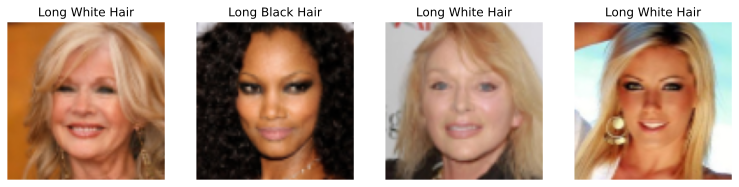

In [ ]:
# visualize some images
display_images(preprocessed_data, labels_array, num_images_to_display=4, fig_size=(13, 10))

- The dispalyed images above looks much accomodating for the hair features hence proceeded to Flattening and Normalising the images

##### Flatten, Normalise, split the dataset and create a dataloader

In [ ]:
## 4. Flatten and Normalize the preprocessed_data

# Flatten
flattened_preprocessed_data = preprocessed_data.reshape(preprocessed_data.shape[0], -1)

# Normalize the pixel values to a range of 0 - 1
dataNormOCV = flattened_preprocessed_data / np.max(flattened_preprocessed_data)

In [ ]:
dataNormOCV.shape

(9118, 24300)

In [ ]:
# Step 1: transform dataNorm to 4D tensor and labels to tensor
data4dTOCV   = torch.tensor( dataNormOCV ).float().view(-1, 3, 90, 90)
labelsT = torch.tensor( labels_array ).long()  # long = int64

# Step 2: split the data into (80:20)
train_data,testTMP_data, train_labels,testTMP_labels = train_test_split(data4dTOCV, labelsT, test_size=.2, shuffle = True, random_state = 100)

# Step 3: Further split the 20% into 50:50 for validation and test
val_data,test_data, val_labels,test_labels = train_test_split(testTMP_data, testTMP_labels, test_size=.5, shuffle = True, random_state = 100)

# Step 4: convert into PyTorch Datasets
train_data = TensorDataset(train_data, train_labels)
val_data = TensorDataset(val_data, val_labels)
test_data  = TensorDataset(test_data, test_labels)

# Step 5: translate into dataloader objects
batchsize    = 32
train_loaderOCV = DataLoader(train_data, batch_size = batchsize, shuffle=True, drop_last=True)
val_loaderOCV = DataLoader(val_data, batch_size = val_data.tensors[0].shape[0])
test_loaderOCV  = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])

In [ ]:
# check sizes
print( train_loaderOCV.dataset.tensors[0].shape )
print( val_loaderOCV.dataset.tensors[0].shape )
print( test_loaderOCV.dataset.tensors[0].shape )

print(' ')

print( train_loaderOCV.dataset.tensors[1].shape )
print( val_loaderOCV.dataset.tensors[1].shape )
print( test_loaderOCV.dataset.tensors[1].shape )

torch.Size([7294, 3, 90, 90])
torch.Size([912, 3, 90, 90])
torch.Size([912, 3, 90, 90])
 
torch.Size([7294])
torch.Size([912])
torch.Size([912])


##### function that creates the model

##### Train the model and show the results

- The `TheCNN1net()` model, optimized in the CNN section, was used.  

- A seed was set to ensure reproducibility of results.  

- The `train_loaderOCV` and `val_loaderOCV` created in this section, along with the outputs of `TheCNN1net()`, were passed into the **`trainTheModel`** function defined in the ANN section. The number of epochs was specified, and the model was trained.  

In [ ]:
# set seed
np.random.seed(100)
torch.manual_seed(100)
random.seed(100)

# train
trainLossOCV, valLossOCV, trainAccOCV, valAccCNNOCV, netCNNOCV = trainTheModel(
    *TheCNN1net(),
    numepochs=30,
    train_loader=train_loaderOCV,
    val_loader=val_loaderOCV,
)


Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/227 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Show the losses and accuracies
plot_results(trainLossOCV,valLossOCV,trainAccOCV,valAccCNNOCV, caption="Loss and Accuracy")

## **Evaluation**

### **Error Analysis**

#### **ANN**

##### Training predictions and validation predictions

Training predictions and validation predictions were calculated to compute various metrics, including accuracy, precision, recall, and the confusion matrix.

In [ ]:
# Move the model to CPU
netANN1.eval()
netANN1.to('cpu')

with torch.no_grad():
  # predictions for training data
  yHat = netANN1(train_loaderANN.dataset.tensors[0])
  train_predANN = torch.argmax(yHat,axis=1)

  # predictions for validation data
  yHat = netANN1(val_loaderANN.dataset.tensors[0])
  val_predANN = torch.argmax(yHat,axis=1)

val_predANN

tensor([1, 3, 3, 2, 2, 3, 3, 3, 4, 4, 4, 1, 4, 2, 3, 1, 3, 3, 1, 2, 2, 3, 3, 2,
        3, 2, 2, 3, 1, 2, 1, 4, 3, 3, 1, 2, 2, 1, 3, 2, 3, 4, 4, 0, 1, 3, 2, 4,
        3, 4, 3, 2, 2, 1, 4, 2, 2, 4, 2, 4, 4, 1, 0, 3, 4, 0, 0, 2, 2, 4, 4, 4,
        2, 4, 2, 2, 3, 3, 2, 0, 4, 1, 4, 1, 2, 4, 4, 4, 4, 2, 2, 0, 2, 4, 4, 3,
        2, 0, 3, 1, 4, 4, 4, 1, 2, 3, 0, 4, 4, 4, 3, 1, 4, 4, 4, 1, 3, 2, 2, 4,
        3, 4, 4, 4, 3, 3, 0, 2, 4, 4, 2, 4, 3, 3, 4, 2, 1, 3, 3, 2, 4, 4, 2, 1,
        1, 2, 2, 2, 3, 1, 2, 4, 4, 4, 2, 3, 1, 4, 2, 1, 3, 4, 1, 3, 3, 2, 2, 2,
        1, 2, 3, 4, 3, 4, 1, 3, 4, 1, 0, 4, 2, 1, 3, 1, 1, 4, 1, 2, 4, 4, 3, 1,
        3, 3, 2, 3, 3, 4, 3, 1, 2, 3, 4, 3, 2, 2, 1, 4, 1, 1, 1, 2, 2, 4, 1, 1,
        4, 3, 4, 3, 1, 4, 4, 4, 2, 4, 4, 4, 1, 2, 1, 3, 2, 4, 0, 4, 3, 4, 3, 3,
        2, 1, 3, 1, 4, 0, 1, 1, 2, 3, 3, 2, 4, 4, 4, 1, 4, 2, 4, 2, 3, 3, 4, 2,
        3, 4, 1, 2, 3, 3, 2, 4, 1, 4, 0, 2, 4, 3, 4, 2, 1, 3, 4, 1, 1, 2, 2, 2,
        1, 4, 1, 1, 1, 3, 1, 4, 1, 1, 0,

##### Precision and Recall

Precision and recall were computed by setting the attribute **`average=None`**.  
- This approach calculates precision and recall for each of the five categories individually, rather than obtaining an average precision across the five classes (as would be the case with **`average='weighted'`**).  

In [ ]:
# validation metrics for the ANN model
precision_ANN = skm.precision_score(val_loaderANN.dataset.tensors[1],val_predANN,average=None)
recall_ANN = skm.recall_score   (val_loaderANN.dataset.tensors[1],val_predANN,average=None)

print(precision_ANN)
print(recall_ANN)

[0.68965517 0.89268293 0.90640394 0.91542289 0.61678832]
[0.15873016 0.94329897 0.92462312 0.88888889 0.90860215]


##### Funtion that display the precision and recall plot

The fucntion below plots the precision and recall for the 5 classes. Inpiration is gotten from plotly website (Plotly Python Bar Charts 2023).

This function would be used to show the precision and recall for other models.

In [ ]:
def plot_precision_recall(precision, recall, title='Fig 41:'):

    # Create a Plotly figure
    fig = go.Figure()

    # Bar trace for precision
    fig.add_trace(go.Bar(x=[i - 0.15 for i in range(5)], y=precision, name='Precision', width=0.3))

    # Bar trace for recall
    fig.add_trace(go.Bar(x=[i + 0.15 for i in range(5)], y=recall, name='Recall', width=0.3))

    # Figure layout configuration
    fig.update_layout(
        xaxis_title='Classes',
        xaxis=dict(
            tickmode='array',
            tickvals=[i for i in range(5)],
            ticktext=[faceCategories[i] for i in range(5)], # class labels as x-axis ticks
            range=[-0.5, 4.5]  # range of the x-axis for better visualization
        ),
        yaxis_title='Value',
        yaxis=dict(range=[0, 1]), # y-axis range
        legend=dict(x=0.9, y=1), # legend position
        hovermode='x unified', # hover mode
        bargap=0.15, # gap between bars of different categories
        bargroupgap=0.1, # gap between bars of the same category
        margin=dict(b=100),  # Increase bottom margin to accommodate the title
    )

    # Add title as annotation
    fig.add_annotation(
        text=title,
        xref='paper',
        yref='paper',
        x=0.5,
        y=-0.25,
        showarrow=False,
        font=dict(size=14)
    )

    # Display the figure
    fig.show()


In [ ]:
plot_precision_recall(precision_ANN, recall_ANN, 'Category-specific performance metrics')

The precision and recall metrics above provide insights into the model's performance in terms of class bias.

Precision indicates how often the model predicts a class is present when it is not. Conversely, recall measures how often the model predicts a class is not present when it actually is (Raschka et al., 2022).

In the bar chart above, the recall for the Bald class is notably low, indicating the model is likely to misclassify a Bald class image as another category. This means the model often predicts "not Bald" when the image is actually in the Bald category. Additionally, precision for the Bald class is also low, though not as low as recall. This suggests the model may also incorrectly predict an image belongs to the Bald class when it belongs to another category.

The lower recall compared to precision for the Bald class indicates the model is more likely to misclassify Bald images as another category rather than misclassifying other categories as Bald.

To identify the class that Bald is being misclassified as, two methods can be used:  
1. **Inspecting the Confusion Matrix**: This provides an overview of which classes are being misclassified as each other.  
2. **Inspecting Random Errors**:  
   - This can be tailored to focus on errors specific to the Bald class to identify what the model is misclassifying.  
   - Further refinement can rank errors by the highest losses, allowing inspection of the most significant misclassifications.  

Both methods were explored for this model, but the confusion matrix method was used for other models to avoid repetition. Explanations for subsequent models are condensed as they follow similar reasoning to what is described here.  

##### Function that shows the confusion matrix

The below function plots the confusion matrix for the tainining and validation. Inspiration is gotten from Plotly.

In [ ]:
def plot_confusion_matrices(trainConf, valConf, title='Fig 42: Confusion Matrices'):
    # Create subplots
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Train confusion matrix", "Validation confusion matrix"))

    # Confusion matrix during TRAIN
    fig.add_trace(
        go.Heatmap(z=trainConf, x=[faceCategories[i] for i in range(5)], y=[faceCategories[i] for i in range(5)],
                   colorscale='Blues', zmax=0.05, showscale=False),
        row=1, col=1
    )

    # Confusion matrix during VALIDATION
    fig.add_trace(
        go.Heatmap(z=valConf, x=[faceCategories[i] for i in range(5)], y=[faceCategories[i] for i in range(5)],
                   colorscale='Blues', zmax=0.05),
        row=1, col=2
    )

    # Stylize the matrices
    fig.update_layout(
        xaxis=dict(title='Predicted class', domain=[0, 0.41]),
        yaxis=dict(title='True class'),
        xaxis2=dict(title='Predicted class', domain=[0.59, 1]),
        yaxis2=dict(title='True class'),
        width=1000,
        height=400,
        margin=dict(b=100)
    )

    # Add title as annotation
    fig.add_annotation(
        text=title,
        xref='paper',
        yref='paper',
        x=0.5,
        y=-0.50,
        showarrow=False,
        font=dict(size=14)
    )

    # Display the figure
    fig.show()

##### Confusion matrix

Computing the confusion matrix and plotting it

In [ ]:
# confusion matrices
trainConfANN = skm.confusion_matrix(train_loaderANN.dataset.tensors[1], train_predANN, normalize='true')
valConfANN = skm.confusion_matrix(val_loaderANN.dataset.tensors[1], val_predANN, normalize='true')

In [ ]:
plot_confusion_matrices(trainConfANN, valConfANN, 'Confusion Matrices')

It is evident from the validation confusion matrix what the model is misclassifying Bald as. The matrix shows that the model correctly identifies the Bald class only a few times, with most misclassifications labeling Bald heads as Short White Hair.  

This indicates that the model frequently confuses the Bald category with Short White Hair. This behavior can be further analyzed by inspecting the errors specifically for the Bald class.  

##### Funtion that inspects random images that was misclassified

- The function below displays random images misclassified by the model. Additionally, it can inspect misclassified images from a specific class if the **`target_class`** attribute is set.  

- Certain aspects of the function, such as the height (**`h`**) and width (**`w`**) of the images, are soft-coded to accommodate the various image sizes used across all the models built.  

- The function attributes include **`loader`**, **`net`**, **`num_images_to_display=4`**, **`target_class=None`**, **`h=109`**, **`w=89`**, and **`image_width=3`**.  

In [ ]:
def display_wrong_predictions(loader, net, num_images_to_display=4, target_class=None, h=109, w=89, image_width=3):

    X, y = next(iter(loader))
    X = X.to('cpu')
    y = y.to('cpu')
    net.eval()
    predictions = torch.argmax(net(X), axis=1)

    # Find the indices where the predictions do not match the true labels using np.where
    wrong_indices = np.where(np.not_equal(predictions.cpu().numpy(), y.cpu().numpy()))[0]

    if target_class is not None:
        # Find the indices where the true labels match the target class
        target_class_indices = np.where(y.cpu().numpy() == target_class)[0]

        # Keep only the wrong indices that belong to the target class
        wrong_indices = np.intersect1d(wrong_indices, target_class_indices)

    #shuffle the wrong indices
    np.random.shuffle(wrong_indices)

    # If there are fewer wrong predictions than the specified number of images to display, show all wrong predictions
    num_wrong_predictions = len(wrong_indices)
    num_images_to_display = min(num_images_to_display, num_wrong_predictions)

    # Select the first num_images_to_display indices
    selected_indices = wrong_indices[:num_images_to_display]

    fig, axs = plt.subplots(1, num_images_to_display, figsize=(image_width * num_images_to_display, image_width * h / w))

    for i, ax in zip(selected_indices, axs.flatten()):
        # Extract that image
        image_data = X.data[i].numpy()
        if image_data.ndim == 1:
            image = np.reshape(image_data, (h, w, 3))*255
            image = image.astype(np.uint8)
        else:
            image = image_data.transpose((1, 2, 0))
            image = (image * 255).astype(np.uint8)

        # Convert the image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Show the image
        ax.imshow(image_rgb)

        # Label and true class
        pred_label = faceCategories[predictions[i].item()]
        true_label = faceCategories[y[i].item()]

        # Set the title for predicted labels
        ax.set_title(f"Pred: {pred_label}", fontsize=8, pad=8)

        # Text label
        ax.text(0.5, 0.01, f"True: {true_label}", fontsize=8, color='white', ha='center', va='top', transform=ax.transAxes, bbox=dict(facecolor='black', alpha=1.0))

        ax.axis('off')

    plt.tight_layout()
    plt.show()


##### Inspecting Random errors of the model

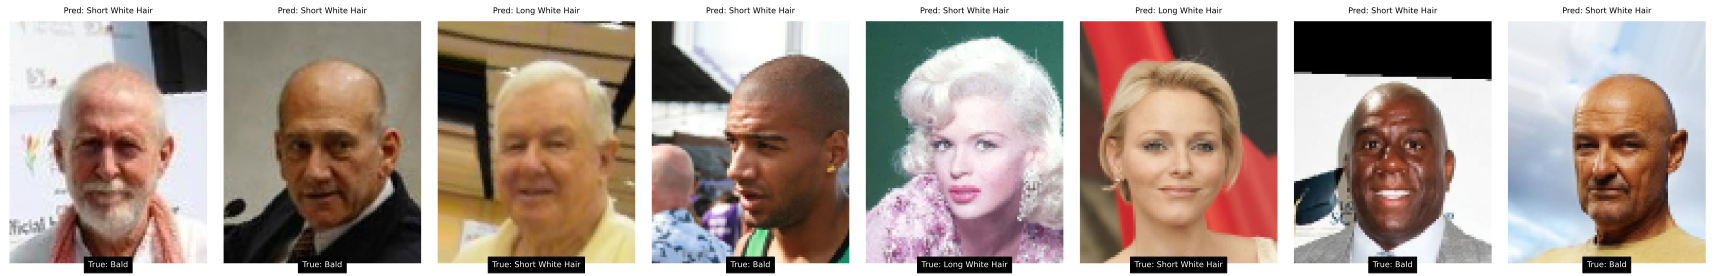

In [ ]:
## Display 8 random images that was misclassified

np.random.seed # For reproducibility
seed = 100

display_wrong_predictions(val_loaderANN, netANN1, num_images_to_display=8)

These are some of the random errors of the model:  

- The images reveal that the model has a bias toward misclassifying the Bald class as Short White Hair.  

##### **Inspecting random errors for the class with the least precision (class 0: Bald)**

The target class attribute was set to 0 to validate the findings from the confusion matrix.  

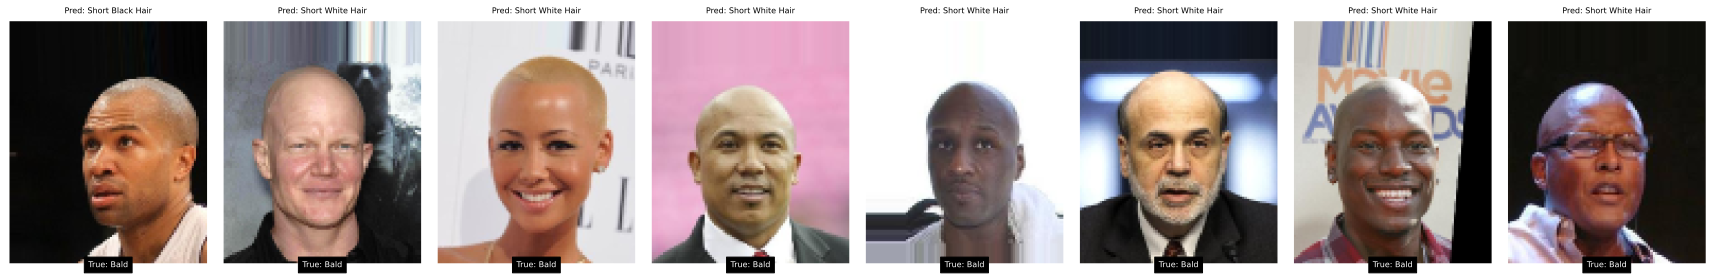

In [ ]:
## Display 8 random images from Bald category that was misclassified

np.random.seed(seed) # For reproducibility
seed = 100

display_wrong_predictions(val_loaderANN, netANN1, num_images_to_display=8, target_class=0)

The results confirm what the confusion matrix indicated earlier: most of the images, except for one or two, demonstrate that the model has a bias toward classifying the Bald class as the Short White Hair class.  

A potential solution to address this issue would be to acquire more images of Bald categories. Providing the model with a sufficient number of Bald class samples could improve its ability to distinguish between the Bald and Short White Hair classes. Currently, the Bald class has the fewest samples, so increasing the sample size for this category may help resolve the problem.  

##### **Function that displays images that are misclassified in descending order of losses**

- Inspecting the top errors requires first obtaining the logits (raw predictions from the model). Using the standard cross-entropy loss with reduction set to `none`, the individual loss for each image prediction can be calculated.  

- The losses are then reordered in descending order, ensuring that the predictions with the highest loss values are displayed first.  

In [ ]:
# compute the losses using
lossfun = torch.nn.CrossEntropyLoss(reduction='none')
losses = lossfun(net(X), y)

# display the losses
losses.shape

torch.Size([32])

- Building on the approach described above, the function that displays random misclassified images was modified to include the ability to display images misclassified in descending order of their loss values.  

- Two new attributes were introduced to the function:  
  - **`display_highest_losses=False`**: When set to `True`, the function displays misclassified images in descending order of their loss values.  
  - **`random_display=True`**: When set to `True` and **`display_highest_losses`** is `False`, the function randomly displays misclassified images.  

In [ ]:
def display_wrong_predictions(loader, net, num_images_to_display=4, target_class=None, display_highest_losses=False, h=109, w=89, image_width=3, random_display = True):

    X, y = next(iter(loader))
    X = X.to('cpu')
    y = y.to('cpu')
    net.eval()
    predictions = torch.argmax(net(X), axis=1)

    # Find the indices where the predictions do not match the true labels using np.where
    wrong_indices = np.where(np.not_equal(predictions.cpu().numpy(), y.cpu().numpy()))[0]

    if target_class is not None:
        # Find the indices where the true labels match the target class
        target_class_indices = np.where(y.cpu().numpy() == target_class)[0]

        # Keep only the wrong indices that belong to the target class
        wrong_indices = np.intersect1d(wrong_indices, target_class_indices)

    if display_highest_losses:
        lossfun = torch.nn.CrossEntropyLoss(reduction='none')
        losses = lossfun(net(X), y).detach().cpu().numpy()
        wrong_losses = losses[wrong_indices]

        # Sort the wrong_indices based on their corresponding losses in descending order
        wrong_indices = wrong_indices[np.argsort(wrong_losses)[::-1]]
    elif random_display:
        np.random.shuffle(wrong_indices)

    # If there are fewer wrong predictions than the specified number of images to display, show all wrong predictions
    num_wrong_predictions = len(wrong_indices)
    num_images_to_display = min(num_images_to_display, num_wrong_predictions)

    # Select the first num_images_to_display indices
    selected_indices = wrong_indices[:num_images_to_display]

    fig, axs = plt.subplots(1, num_images_to_display, figsize=(image_width * num_images_to_display, image_width * h / w))

    for i, ax in zip(selected_indices, axs.flatten()):
        # Extract that image
        image_data = X.data[i].numpy()
        if image_data.ndim == 1:
            image = np.reshape(image_data, (h, w, 3))*255
            image = image.astype(np.uint8)
        else:
            image = image_data.transpose((1, 2, 0))
            image = (image * 255).astype(np.uint8)

        # Convert the image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Show the image
        ax.imshow(image_rgb)

        # Label and true class
        pred_label = faceCategories[predictions[i].item()]
        true_label = faceCategories[y[i].item()]

        # Set the title for predicted labels
        ax.set_title(f"Pred: {pred_label}", fontsize=8, pad=8)

        # Add the true_label text as an overlay and adjust the location
        ax.text(0.5, 0.01, f"True: {true_label}", fontsize=8, color='white', ha='center', va='top', transform=ax.transAxes, bbox=dict(facecolor='black', alpha=1.0))

        ax.axis('off')

    plt.tight_layout()
    plt.show()


##### Inspecting top Errors of the model

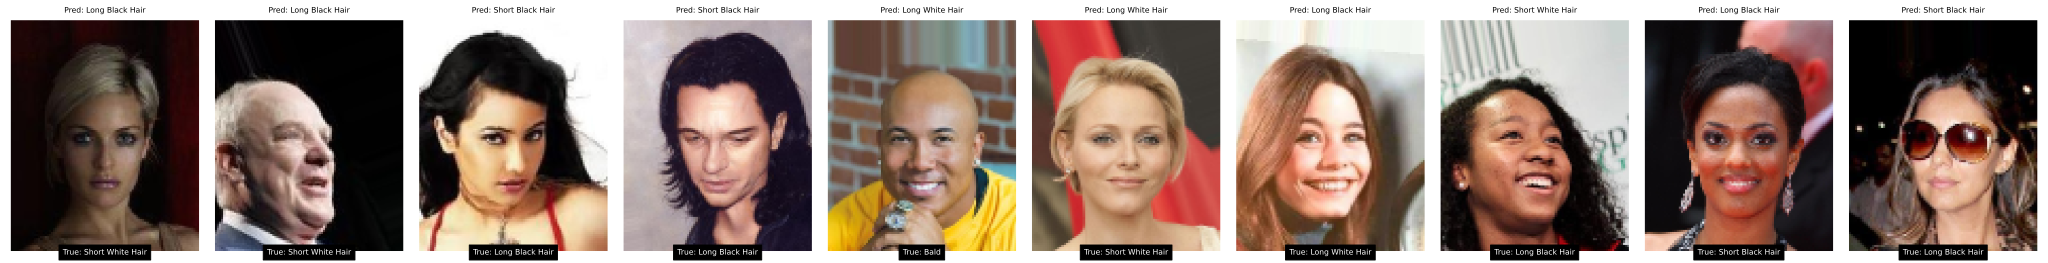

In [ ]:
## Display 10 random images that was misclassified in descending order of their losses
display_wrong_predictions(val_loaderANN, netANN1, num_images_to_display=10, display_highest_losses=True)

Some instances of human error are evident, where images were placed in incorrect classes or where certain images are not ideal representatives for the scenario.  

If such mistakes are frequent, they could significantly reduce the model's performance.  

In addition to the previously identified solution of acquiring more images of Bald individuals, another potential improvement is to carefully curate the dataset. This involves selecting ideal images for each class.  

#### **CNN**

##### Training predictions and validation predictions

In [ ]:
# Move the model to CPU
netCNN1.eval()
netCNN1.to('cpu')

with torch.no_grad():
  # predictions for training data
  yHat = netCNN1(train_loaderCNN.dataset.tensors[0])
  train_predCNN = torch.argmax(yHat,axis=1)

  # predictions for validation data
  yHat = netCNN1(val_loaderCNN.dataset.tensors[0])
  val_predCNN = torch.argmax(yHat,axis=1)

val_predCNN

tensor([3, 3, 3, 2, 2, 1, 3, 3, 4, 4, 2, 1, 0, 2, 3, 1, 0, 0, 1, 2, 2, 1, 3, 2,
        3, 2, 2, 3, 1, 4, 0, 4, 3, 3, 1, 2, 2, 1, 0, 2, 3, 2, 0, 0, 1, 3, 2, 4,
        3, 1, 3, 2, 2, 1, 2, 2, 3, 0, 2, 0, 4, 1, 0, 3, 2, 2, 4, 2, 2, 0, 0, 4,
        2, 4, 2, 2, 2, 3, 2, 0, 0, 1, 4, 1, 2, 0, 4, 4, 4, 2, 2, 3, 2, 4, 4, 3,
        2, 4, 3, 1, 0, 4, 4, 1, 2, 3, 0, 4, 4, 4, 3, 1, 4, 0, 4, 1, 3, 2, 2, 4,
        3, 2, 4, 4, 3, 3, 4, 2, 4, 4, 2, 4, 3, 3, 4, 2, 1, 3, 3, 2, 3, 0, 2, 1,
        1, 2, 2, 2, 3, 1, 2, 4, 0, 4, 2, 3, 1, 0, 2, 1, 3, 2, 1, 3, 1, 2, 2, 2,
        1, 2, 3, 4, 3, 4, 0, 3, 4, 1, 0, 4, 2, 1, 3, 1, 0, 0, 1, 2, 4, 4, 3, 1,
        3, 3, 2, 3, 3, 4, 3, 0, 2, 3, 4, 3, 2, 2, 1, 4, 1, 1, 3, 2, 2, 4, 1, 1,
        4, 3, 4, 3, 1, 4, 4, 4, 2, 4, 4, 4, 1, 2, 1, 3, 2, 4, 3, 0, 3, 4, 3, 3,
        2, 1, 3, 1, 4, 4, 1, 1, 2, 3, 3, 2, 4, 4, 0, 1, 4, 2, 4, 2, 3, 3, 4, 2,
        3, 4, 1, 4, 3, 3, 2, 0, 1, 4, 0, 2, 4, 3, 4, 2, 1, 3, 4, 1, 1, 2, 2, 2,
        1, 0, 1, 1, 1, 1, 3, 4, 1, 1, 4,

##### Precision and Recall

In [ ]:
# validation metrics for the ANN model
precision_CNN = skm.precision_score(val_loaderCNN.dataset.tensors[1],val_predCNN,average=None)
recall_CNN = skm.recall_score   (val_loaderCNN.dataset.tensors[1],val_predCNN,average=None)

print(precision_CNN)
print(recall_CNN)

[0.69892473 0.8989899  0.82488479 0.89552239 0.71921182]
[0.51587302 0.91752577 0.89949749 0.86956522 0.78494624]


In [ ]:
plot_precision_recall(precision_CNN, recall_CNN, 'Fig 41: Category-specific performance metrics')

The same issue is observed with this model, showing low recall for the Bald class. This indicates a higher tendency for the model to fail in identifying the Bald class when presented with one.  

##### Confusion matrix

In [ ]:
# confusion matrices
trainConfCNN = skm.confusion_matrix(train_loaderCNN.dataset.tensors[1], train_predCNN, normalize='true')
valConfCNN = skm.confusion_matrix(val_loaderCNN.dataset.tensors[1], val_predCNN, normalize='true')

In [ ]:
plot_confusion_matrices(trainConfCNN, valConfCNN, 'Confusion Matrices')

The confusion matrix confirms it again that the Bald class is being misclassifed most of the time as Short White Hair

#### **CNN with KNN**

##### Training predictions and validation predictions

In [ ]:
# predictions for training data
train_predCNNKNN = knn_classifier.predict(train_features)
# train_pred = torch.tensor(train_pred)

# predictions for validation data
val_predCNNKNN = knn_classifier.predict(val_features)

val_predCNNKNN

array([1, 3, 3, 2, 2, 1, 3, 3, 0, 4, 2, 1, 0, 0, 3, 1, 3, 3, 1, 2, 2, 3,
       3, 2, 3, 2, 2, 3, 1, 0, 0, 4, 3, 3, 1, 2, 2, 1, 3, 2, 3, 2, 0, 0,
       1, 3, 2, 4, 1, 1, 3, 2, 2, 3, 0, 2, 2, 0, 4, 4, 4, 1, 0, 3, 4, 2,
       4, 2, 2, 0, 0, 4, 2, 4, 3, 2, 2, 3, 2, 0, 0, 1, 4, 1, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 4, 4, 3, 2, 0, 3, 3, 0, 4, 4, 1, 2, 3, 0, 2, 4, 4,
       3, 1, 4, 0, 0, 1, 3, 2, 2, 4, 3, 2, 4, 0, 3, 3, 4, 2, 4, 4, 2, 4,
       1, 3, 0, 2, 1, 3, 3, 2, 4, 0, 2, 1, 1, 2, 2, 2, 3, 1, 2, 0, 0, 4,
       2, 3, 1, 4, 2, 1, 3, 2, 1, 3, 1, 4, 2, 4, 1, 2, 3, 0, 3, 0, 0, 0,
       4, 1, 0, 4, 2, 1, 3, 1, 0, 0, 1, 2, 4, 4, 3, 1, 3, 3, 2, 3, 3, 0,
       3, 0, 2, 3, 4, 3, 2, 2, 1, 4, 1, 1, 3, 2, 2, 4, 1, 1, 4, 3, 0, 3,
       1, 4, 4, 4, 2, 4, 4, 4, 1, 2, 1, 3, 2, 4, 3, 0, 3, 0, 3, 0, 2, 1,
       3, 1, 0, 0, 1, 1, 2, 3, 3, 2, 4, 4, 4, 1, 0, 2, 4, 2, 3, 3, 4, 2,
       3, 4, 1, 4, 1, 3, 4, 0, 1, 4, 0, 2, 4, 3, 4, 2, 1, 3, 4, 1, 1, 2,
       2, 2, 1, 0, 1, 1, 1, 3, 3, 4, 1, 1, 0, 3, 3,

##### Precision and Recall

In [ ]:
# validation metrics for the ANN model
precision_CNNknn = skm.precision_score(val_labels,val_predCNNKNN,average=None)
recall_CNNknn = skm.recall_score   (val_labels,val_predCNNKNN,average=None)

print(precision_CNNknn)
print(recall_CNNknn)

[0.44715447 0.85365854 0.86082474 0.85786802 0.66839378]
[0.43650794 0.90206186 0.83919598 0.81642512 0.69354839]


In [ ]:
plot_precision_recall(precision_CNNknn, recall_CNNknn, 'Fig 41: Category-specific performance metrics')

The same problem can be confirmed with this model too

##### Confusion matrix

In [ ]:
# confusion matrices
trainConfCNNKNN = skm.confusion_matrix(train_labels, train_predCNNKNN, normalize='true')
valConfCNNKNN = skm.confusion_matrix(val_labels, val_predCNNKNN, normalize='true')

In [ ]:
plot_confusion_matrices(trainConfCNNKNN, valConfCNNKNN, 'Confusion Matrices')

#### **CNN with SVM**

##### Training predictions and validation predictions

In [ ]:

# predictions for training data
train_predCNNSVM = svm_classifier.predict(train_features)

# predictions for validation data
val_predCNNSVM = svm_classifier.predict(val_features)

val_predCNNSVM

array([1, 3, 3, 2, 2, 3, 3, 3, 4, 4, 2, 1, 4, 4, 3, 1, 0, 0, 1, 2, 2, 3,
       3, 2, 3, 2, 2, 3, 1, 0, 0, 4, 3, 3, 1, 2, 2, 1, 3, 2, 2, 2, 4, 0,
       1, 3, 2, 4, 1, 1, 3, 2, 2, 1, 0, 2, 3, 4, 4, 0, 4, 1, 0, 3, 4, 2,
       4, 2, 2, 3, 0, 4, 2, 4, 3, 2, 2, 3, 2, 0, 0, 1, 4, 1, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 4, 4, 3, 2, 4, 3, 1, 0, 4, 4, 1, 2, 3, 4, 2, 4, 4,
       3, 1, 4, 4, 0, 1, 3, 2, 4, 4, 3, 4, 4, 4, 3, 3, 0, 2, 4, 4, 2, 4,
       1, 1, 0, 2, 1, 3, 3, 2, 4, 0, 2, 1, 1, 2, 2, 4, 3, 1, 2, 4, 4, 4,
       2, 3, 1, 4, 2, 1, 3, 2, 1, 3, 1, 4, 2, 4, 1, 2, 3, 0, 3, 4, 0, 3,
       4, 1, 0, 4, 2, 1, 3, 1, 0, 0, 1, 2, 4, 4, 3, 1, 3, 3, 2, 1, 3, 4,
       3, 0, 2, 3, 4, 3, 2, 2, 1, 4, 1, 1, 3, 2, 2, 4, 1, 1, 4, 3, 0, 3,
       1, 4, 4, 4, 2, 4, 4, 4, 1, 2, 1, 3, 2, 4, 3, 0, 3, 4, 3, 3, 2, 1,
       3, 1, 4, 4, 1, 1, 4, 3, 3, 2, 4, 4, 4, 1, 4, 2, 4, 2, 3, 3, 4, 2,
       3, 4, 1, 4, 3, 3, 2, 0, 1, 4, 0, 2, 4, 3, 4, 2, 1, 3, 4, 1, 1, 2,
       2, 2, 1, 0, 1, 1, 1, 1, 3, 4, 0, 1, 4, 3, 3,

##### Precision and Recall

val_labels and val_loaderCNN.dataset.tensors[1] are the same

In [ ]:
# validation metrics for the ANN model
precision_CNNsvm = skm.precision_score(val_loaderCNN.dataset.tensors[1],val_predCNNSVM,average=None)
recall_CNNsvm = skm.recall_score   (val_loaderCNN.dataset.tensors[1],val_predCNNSVM,average=None)

print(precision_CNNsvm)
print(recall_CNNsvm)

[0.61728395 0.87804878 0.85863874 0.89637306 0.6446281 ]
[0.3968254  0.92783505 0.8241206  0.83574879 0.83870968]


In [ ]:
plot_precision_recall(precision_CNNsvm, recall_CNNsvm, 'Category-specific performance metrics')

The same problem can be confirmed with this model too

##### Confusion matrix

In [ ]:
# confusion matrices
trainConfCNNSVM = skm.confusion_matrix(train_labels, train_predCNNSVM, normalize='true')
valConfCNNSVM = skm.confusion_matrix(val_labels, val_predCNNSVM, normalize='true')

In [ ]:
plot_confusion_matrices(trainConfCNNSVM, valConfCNNSVM, 'Confusion Matrices')

#### **OpenCV with CNN**

##### Training predictions and validation predictions

In [ ]:
# Move the model to CPU
netCNNOCV.eval()
netCNNOCV.to('cpu')

with torch.no_grad():
  # predictions for training data
  yHat = netCNNOCV(train_loaderOCV.dataset.tensors[0])
  train_predOCV = torch.argmax(yHat,axis=1)

  # predictions for validation data
  yHat = netCNNOCV(val_loaderOCV.dataset.tensors[0])
  val_predOCV = torch.argmax(yHat,axis=1)

val_predOCV

tensor([1, 3, 3, 2, 2, 1, 3, 3, 4, 4, 2, 1, 4, 2, 3, 1, 4, 4, 1, 2, 2, 3, 0, 2,
        3, 2, 2, 3, 1, 1, 1, 4, 3, 1, 1, 2, 2, 1, 3, 2, 2, 4, 4, 3, 1, 3, 2, 4,
        3, 1, 3, 2, 2, 1, 4, 2, 4, 2, 2, 4, 4, 1, 3, 3, 2, 2, 0, 2, 2, 0, 2, 4,
        2, 4, 2, 2, 2, 3, 2, 0, 0, 1, 4, 1, 2, 4, 4, 4, 4, 2, 2, 3, 2, 4, 4, 3,
        2, 4, 3, 1, 4, 4, 4, 1, 2, 3, 4, 4, 4, 4, 3, 1, 0, 4, 4, 1, 3, 2, 2, 4,
        3, 4, 4, 4, 3, 3, 2, 2, 4, 4, 2, 4, 3, 3, 4, 2, 1, 3, 3, 2, 3, 4, 2, 1,
        1, 2, 2, 4, 3, 1, 2, 4, 4, 4, 2, 3, 1, 4, 2, 1, 3, 2, 1, 3, 1, 4, 2, 2,
        1, 2, 3, 4, 3, 4, 3, 1, 4, 1, 4, 4, 4, 1, 3, 1, 1, 0, 1, 2, 4, 4, 3, 1,
        4, 3, 2, 3, 3, 4, 3, 1, 2, 3, 4, 3, 2, 2, 1, 4, 1, 1, 3, 2, 4, 4, 3, 1,
        4, 3, 4, 3, 1, 4, 4, 1, 2, 4, 4, 4, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 3, 3,
        2, 1, 3, 1, 4, 4, 1, 1, 4, 2, 3, 2, 4, 4, 4, 1, 4, 2, 4, 2, 3, 3, 4, 2,
        3, 4, 1, 4, 3, 3, 2, 4, 1, 4, 0, 2, 4, 3, 4, 2, 1, 3, 4, 1, 1, 2, 2, 2,
        1, 4, 1, 1, 1, 3, 3, 4, 1, 1, 4,

##### Precision and Recall

In [ ]:
# validation metrics for the ANN model
precision_OCV = skm.precision_score(val_loaderOCV.dataset.tensors[1],val_predOCV,average=None)
recall_OCV = skm.recall_score   (val_loaderOCV.dataset.tensors[1],val_predOCV,average=None)

print(precision_OCV)
print(recall_OCV)

[0.72340426 0.91836735 0.86341463 0.85507246 0.62645914]
[0.26984127 0.92783505 0.88944724 0.85507246 0.8655914 ]


In [ ]:
plot_precision_recall(precision_OCV, recall_OCV, 'Category-specific performance metrics')

##### Confusion matrix

In [ ]:
# confusion matrices
trainConfOCV = skm.confusion_matrix(train_loaderOCV.dataset.tensors[1], train_predOCV, normalize='true')
valConfOCV = skm.confusion_matrix(val_loaderOCV.dataset.tensors[1], val_pred, normalize='true')

In [ ]:
plot_confusion_matrices(trainConfOCV, valConfOCV, 'Confusion Matrices')

### **Comparing Model Performance**

##### Accuracy

###### Computing the accuracy

The train and validation accuracy for each model is computed.

In [ ]:
# Train accuracy
accuracyTrain_ANN = skm.accuracy_score (train_loaderANN.dataset.tensors[1],train_predANN)
accuracyTrain_CNN = skm.accuracy_score (train_loaderCNN.dataset.tensors[1],train_predCNN)
accuracyTrain_CNNSVM = skm.accuracy_score (train_labels,train_predCNNSVM)
accuracyTrain_CNNKNN = skm.accuracy_score (train_labels,train_predCNNKNN)
accuracyTrain_OCV = skm.accuracy_score (train_loaderOCV.dataset.tensors[1],train_predOCV)

# Validation accuracy
accuracyVal_ANN = skm.accuracy_score (val_loaderANN.dataset.tensors[1],val_predANN)
accuracyVal_CNN = skm.accuracy_score (val_loaderCNN.dataset.tensors[1],val_predCNN)
accuracyVal_CNNSVM = skm.accuracy_score (val_labels,val_predCNNSVM)
accuracyVal_CNNKNN = skm.accuracy_score (val_labels,val_predCNNKNN)
accuracyVal_OCV = skm.accuracy_score (val_loaderOCV.dataset.tensors[1],val_predOCV)

print(accuracyTrain_ANN, accuracyTrain_CNN, accuracyTrain_CNNSVM, accuracyTrain_CNNKNN, accuracyTrain_OCV)
print(accuracyVal_ANN, accuracyVal_CNN, accuracyVal_CNNSVM, accuracyVal_CNNKNN, accuracyVal_OCV)

0.8585138469975322 0.8741431313408281 0.21593090211132437 0.21277762544557172 0.8711269536605429
0.8114035087719298 0.8201754385964912 0.7927631578947368 0.7620614035087719 0.7993421052631579


 Creating a dictionary to store the values of the train and validation accuracy

In [ ]:
accuracy_values_train = {
    'ANN': accuracyTrain_ANN,
    'CNN': accuracyTrain_CNN,
    'CNN_KNN': accuracyTrain_CNNKNN,
    'CNN_SVM': accuracyTrain_CNNSVM,
    'OpenCV': accuracyTrain_OCV,
}

accuracy_values_val = {
    'FFN': accuracyVal_ANN,
    'CNN': accuracyVal_CNN,
    'CNN_KNN': accuracyVal_CNNKNN,
    'CNN_SVM': accuracyVal_CNNSVM,
    'OpenCV': accuracyVal_OCV,
}


###### Displaying the accuracy in a table format

In [ ]:
# Create a dictionary of train and val accuracies
data = {
    "Train Accuracy (%)": [round(value * 100, 2) for value in accuracy_values_train.values()],
    "Validation Accuracy (%)": [round(value * 100, 2) for value in accuracy_values_val.values()],
}

# Create a pandas DataFrame using the data dictionary and set the index to the model names
accuracy_df = pd.DataFrame(data, index=list(accuracy_values_train.keys()))

# Display the table
display(accuracy_df)


Train Accuracy (%)  Validation Accuracy (%)
ANN                   85.85                    81.14
CNN                   87.41                    82.02
CNN_KNN               21.28                    76.21
CNN_SVM               21.59                    79.28
OpenCV                87.11                    79.93

###### Plotting the bar graph Accuracy

The bar chart compares the accuracy of the 5 models for both train and validation. Inspiration for this bar grapgh is gotten from plotly (Plotly Python Bar Charts n.d)

In [ ]:
# Create a Plotly figure
fig = go.Figure()

train_color = 'rgba(0, 191, 255, 0.9)'  # Bright blue color for train bars
val_color = 'rgba(0, 255, 127, 0.9)'  # Bright green color for validation bars

# Add bar traces for each model's train accuracy
for idx, (model, accuracy) in enumerate(accuracy_values_train.items()):
    fig.add_trace(go.Bar(name="Train", x=[idx - 0.15], y=[accuracy], width=0.3, marker_color=train_color, showlegend=(idx==0)))

# Add bar traces for each model's validation accuracy
for idx, (model, accuracy) in enumerate(accuracy_values_val.items()):
    fig.add_trace(go.Bar(name="Val", x=[idx + 0.15], y=[accuracy], width=0.3, marker_color=val_color, showlegend=(idx==0)))

# Update the layout of the figure
fig.update_layout(
    xaxis_title='Models',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(len(accuracy_values_train))),
        ticktext=list(accuracy_values_train.keys()),
        range=[-0.5, len(accuracy_values_train) - 0.5],  # Add allowance before the first bar and after the last bar
    ),
    yaxis_title='Accuracy',
    yaxis=dict(range=[0.6, 1]),  # y-axis range to emphasize differences
    barmode='group',
    legend=dict(title="Bars"),
    margin=dict(b=100)  # Increase bottom margin to accommodate the title
)

# Add title as an annotation at the bottom
fig.add_annotation(
    text='Model Accuracies Comparison (Train and Validation)',
    xref='paper',
    yref='paper',
    x=0.5,
    y=-0.25,
    showarrow=False,
    font=dict(size=14)
)

# Display the figure
fig.show()

##### Precision

###### Computing the Precision

The **`average='weighted'`** attribute was used to calculate a single value representing the precision across the 10 classes for each model.

In [ ]:
# Train precision
precisionTrain_ANN = skm.precision_score (train_loaderANN.dataset.tensors[1],train_predANN,average='weighted')
precisionTrain_CNN = skm.precision_score (train_loaderCNN.dataset.tensors[1],train_predCNN,average='weighted')
precisionTrain_CNNSVM = skm.precision_score (train_labels,train_predCNNSVM,average='weighted')
precisionTrain_CNNKNN = skm.precision_score (train_labels,train_predCNNKNN,average='weighted')
precisionTrain_OCV = skm.precision_score (train_loaderOCV.dataset.tensors[1],train_predOCV,average='weighted')

# Validation precision
precisionVal_ANN = skm.precision_score (val_loaderANN.dataset.tensors[1],val_predANN,average='weighted')
precisionVal_CNN = skm.precision_score (val_loaderCNN.dataset.tensors[1],val_predCNN,average='weighted')
precisionVal_CNNSVM = skm.precision_score (val_labels,val_predCNNSVM,average='weighted')
precisionVal_CNNKNN = skm.precision_score (val_labels,val_predCNNKNN,average='weighted')
precisionVal_OCV = skm.precision_score (val_loaderOCV.dataset.tensors[1],val_predOCV,average='weighted')

print(precisionTrain_ANN, precisionTrain_CNN, precisionTrain_CNNSVM, precisionTrain_CNNKNN, precisionTrain_OCV)
print(precisionVal_ANN, precisionVal_CNN, precisionVal_CNNSVM, precisionVal_CNNKNN, precisionVal_OCV)

0.8736973648626845 0.873928039260155 0.21137454122933255 0.2129330656776969 0.882008673581598
0.816520382473825 0.817727153079965 0.7943403512985355 0.7622316523573432 0.8055406956684948


Creating a dictionary to store the values of the train and validation precision

In [ ]:
precision_values_train = {
    'ANN': precisionTrain_ANN,
    'CNN': precisionTrain_CNN,
    'CNN_KNN': precisionTrain_CNNKNN,
    'CNN_SVM': precisionTrain_CNNSVM,
    'OpenCV': precisionTrain_OCV,
}

precision_values_val = {
    'FFN': precisionVal_ANN,
    'CNN': precisionVal_CNN,
    'CNN_KNN': precisionVal_CNNKNN,
    'CNN_SVM': precisionVal_CNNSVM,
    'OpenCV': precisionVal_OCV,
}


###### Displaying the precision in a table format

In [ ]:
# Create a dictionary of train and val accuracies
data = {
    "Train precision (%)": [round(value * 100, 2) for value in precision_values_train.values()],
    "Validation precision (%)": [round(value * 100, 2) for value in precision_values_val.values()],
}

# Create a pandas DataFrame using the data dictionary and set the index to the model names
precision_df = pd.DataFrame(data, index=list(precision_values_train.keys()))

# Display the table
display(precision_df)


Train precision (%)  Validation precision (%)
ANN                    87.37                     81.65
CNN                    87.39                     81.77
CNN_KNN                21.29                     76.22
CNN_SVM                21.14                     79.43
OpenCV                 88.20                     80.55

###### Plotting the bar graph Precision

The bar chart compares the precision of the 5 models for both train and validation.

In [ ]:
# Create a Plotly figure
fig = go.Figure()

train_color = 'rgba(0, 191, 255, 0.9)'  # Bright blue color for train bars
val_color = 'rgba(0, 255, 127, 0.9)'  # Bright green color for validation bars

# Add bar traces for each model's train precision
for idx, (model, precision) in enumerate(precision_values_train.items()):
    fig.add_trace(go.Bar(name="Train", x=[idx - 0.15], y=[precision], width=0.3, marker_color=train_color, showlegend=(idx==0)))

# Add bar traces for each model's validation precision
for idx, (model, precision) in enumerate(precision_values_val.items()):
    fig.add_trace(go.Bar(name="Val", x=[idx + 0.15], y=[precision], width=0.3, marker_color=val_color, showlegend=(idx==0)))

# Update the layout of the figure
fig.update_layout(
    xaxis_title='Models',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(len(precision_values_train))),
        ticktext=list(precision_values_train.keys()),
        range=[-0.5, len(precision_values_train) - 0.5],
    ),
    yaxis_title='precision',
    yaxis=dict(range=[0.4, 1]),  # y-axis range to emphasize differences
    barmode='group',
    legend=dict(title="Bars"),
    margin=dict(b=100)  # Increase bottom margin to accommodate the title
)

# Add title as an annotation at the bottom
fig.add_annotation(
    text='Model Precision Comparison (Train and Validation)',
    xref='paper',
    yref='paper',
    x=0.5,
    y=-0.25,
    showarrow=False,
    font=dict(size=14)
)

# Display the figure
fig.show()

##### Recall

###### Computing the Recall


The **`average='weighted'`** attribute was used to calculate a single value representing the recall across the 10 classes for each model.

In [ ]:
# Train recall
recallTrain_ANN = skm.recall_score (train_loaderANN.dataset.tensors[1],train_predANN,average='weighted')
recallTrain_CNN = skm.recall_score (train_loaderCNN.dataset.tensors[1],train_predCNN,average='weighted')
recallTrain_CNNSVM = skm.recall_score (train_labels,train_predCNNSVM,average='weighted')
recallTrain_CNNKNN = skm.recall_score (train_labels,train_predCNNKNN,average='weighted')
recallTrain_OCV = skm.recall_score (train_loaderOCV.dataset.tensors[1],train_predOCV,average='weighted')

# Validation recall
recallVal_ANN = skm.recall_score (val_loaderANN.dataset.tensors[1],val_predANN,average='weighted')
recallVal_CNN = skm.recall_score (val_loaderCNN.dataset.tensors[1],val_predCNN,average='weighted')
recallVal_CNNSVM = skm.recall_score (val_labels,val_predCNNSVM,average='weighted')
recallVal_CNNKNN = skm.recall_score (val_labels,val_predCNNKNN,average='weighted')
recallVal_OCV = skm.recall_score (val_loaderOCV.dataset.tensors[1],val_predOCV,average='weighted')

print(recallTrain_ANN, recallTrain_CNN, recallTrain_CNNSVM, recallTrain_CNNKNN, recallTrain_OCV)
print(recallVal_ANN, recallVal_CNN, recallVal_CNNSVM, recallVal_CNNKNN, recallVal_OCV)

0.8585138469975322 0.8741431313408281 0.21593090211132437 0.21277762544557172 0.8711269536605429
0.8114035087719298 0.8201754385964912 0.7927631578947368 0.7620614035087719 0.7993421052631579


Creating a dictionary to store the values of the train and validation recall

In [ ]:
recall_values_train = {
    'ANN': recallTrain_ANN,
    'CNN': recallTrain_CNN,
    'CNN_KNN': recallTrain_CNNKNN,
    'CNN_SVM': recallTrain_CNNSVM,
    'OpenCV': recallTrain_OCV,
}

recall_values_val = {
    'FFN': recallVal_ANN,
    'CNN': recallVal_CNN,
    'CNN_KNN': recallVal_CNNKNN,
    'CNN_SVM': recallVal_CNNSVM,
    'OpenCV': recallVal_OCV,
}


###### Displaying the recall in a table format

In [ ]:
# Create a dictionary of train and val accuracies
data = {
    "Train Recall (%)": [round(value * 100, 2) for value in recall_values_train.values()],
    "Validation Recall (%)": [round(value * 100, 2) for value in recall_values_val.values()],
}

# Create a pandas DataFrame using the data dictionary and set the index to the model names
recall_df = pd.DataFrame(data, index=list(recall_values_train.keys()))

# Display the table
display(recall_df)


Train Recall (%)  Validation Recall (%)
ANN                 85.85                  81.14
CNN                 87.41                  82.02
CNN_KNN             21.28                  76.21
CNN_SVM             21.59                  79.28
OpenCV              87.11                  79.93

###### Plotting the bar graph Precision

In [ ]:
# Create a Plotly figure
fig = go.Figure()

train_color = 'rgba(0, 191, 255, 0.9)'  # Bright blue color for train bars
val_color = 'rgba(0, 255, 127, 0.9)'  # Bright green color for validation bars

# Add bar traces for each model's train recall
for idx, (model, recall) in enumerate(recall_values_train.items()):
    fig.add_trace(go.Bar(name="Train", x=[idx - 0.15], y=[recall], width=0.3, marker_color=train_color, showlegend=(idx==0)))

# Add bar traces for each model's validation recall
for idx, (model, recall) in enumerate(recall_values_val.items()):
    fig.add_trace(go.Bar(name="Val", x=[idx + 0.15], y=[recall], width=0.3, marker_color=val_color, showlegend=(idx==0)))

# Update the layout of the figure
fig.update_layout(
    xaxis_title='Models',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(len(recall_values_train))),
        ticktext=list(recall_values_train.keys()),
        range=[-0.5, len(recall_values_train) - 0.5],
    ),
    yaxis_title='Recall',
    yaxis=dict(range=[0.4, 1]),  # y-axis range to emphasize differences
    barmode='group',
    legend=dict(title="Bars"),
    margin=dict(b=100)  # Increase bottom margin to accommodate the title
)

# Add title as an annotation at the bottom
fig.add_annotation(
    text='Model Recall Comparison (Train and Validation)',
    xref='paper',
    yref='paper',
    x=0.5,
    y=-0.25,
    showarrow=False,
    font=dict(size=14)
)

# Display the figure
fig.show()

### Final Model Evaluation

The best model is identified as the CNN based on the accuracy, precision, and recall metrics from the train and validation sets. Therefore, the final accuracy of the CNN is computed using the test set.

In [ ]:
# Move the model to CPU
netCNN1.eval()
netCNN1.to('cpu')

with torch.no_grad():

  # predictions for test data
  yHat = netCNN1(test_loaderCNN.dataset.tensors[0])
  test_predCNN = torch.argmax(yHat,axis=1)

accuracyTest_CNN = skm.accuracy_score (test_loaderCNN.dataset.tensors[1],test_predCNN)
accuracyTest_CNN

0.8355263157894737

## References

Reference list

- Ayyadevara, K. and Reddy, Y., 2020. Modern Computer Vision with PyTorch [Book] [online]. www.oreilly.com. Available from: https://learning.oreilly.com/library/view/modern-computer-vision/9781839213472/ [Accessed 12 Apr 2023].
- Chen, Y., Lai, Y.-K. and Liu, Y.-J., 2017. Transforming photos to comics using convolutional neural networks [online]. IEEE Xplore. Available from: https://ieeexplore.ieee.org/abstract/document/8296634/references#references [Accessed 8 Mar 2023].
- García, R. R., Quirós, J. S., Santos, R. G., González, S. M. and Fernanz, S. M., 2007. Interactive multimedia animation with Macromedia Flash in Descriptive Geometry teaching. Computers & Education, 49 (3), 615–639.
- Howse, J. and Minichino, J., 2020. Learning OpenCV 4 Computer Vision with Python 3 [Book] [online]. www.oreilly.com. Available from: https://learning.oreilly.com/library/view/learning-opencv-4/9781789531619/ [Accessed 6 Apr 2023].
- Huilgol, P., 2020. Top 4 Pre-Trained Models for Image Classification | With Python Code [online]. Analytics Vidhya. Available from: https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/ [Accessed 10 Apr 2023].
- Liu, Z., Luo, P., Wang, X. and Tang, X., 2015. Large-scale CelebFaces Attributes (CelebA) Dataset [online]. mmlab.ie.cuhk.edu.hk. Available from: http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html.
- Nitish, S., Hinton, G. rey, Krizhevsky, A., Sutskever, I. and Salakhutdinov, R., 2014. Dropout: A Simple Way to Prevent Neural Networks from Overfitting. J. Mach. Learn. Res. [online], 15 (15), 1. Available from: https://cir.nii.ac.jp/crid/1370290617452840969 [Accessed 10 Mar 2023].
- Plotly Python Bar Charts, 2023. plotly.com. Available from: https://plotly.com/python/bar-charts/ [Accessed 15 Apr 2023].
- Pointer, I., 2019. Programming PyTorch for Deep Learning [Book] [online]. www.oreilly.com. Available from: https://learning.oreilly.com/library/view/programming-pytorch-for/9781492045342/ [Accessed 29 Apr 2023].
- Raschka, S., Dzhulgakov, D., Liu, Y. (Hayden), Mirjalili, V. and Dzhulgakov, D., 2022. Machine Learning with PyTorch and Scikit-Learn [Book] [online]. www.oreilly.com. Available from: https://learning.oreilly.com/library/view/machine-learning-with/9781801819312/ [Accessed 1 May 2023].
- Santos, I., Castro, L., Rodriguez-Fernandez, N., Torrente-Patiño, Á. and Carballal, A., 2021. Artificial Neural Networks and Deep Learning in the Visual Arts: a review. Neural Computing and Applications, 33 (1), 121–157.
- Sykes, M., Cerda, L., Cerda, J. and Finch, T., 2022. Disseminating implementation science: Describing the impact of animations shared via social media. PLOS ONE, 17 (7), e0270605.
- Varshni, D., Thakral, K., Agarwal, L., Nijhawan, R. and Mittal, A., 2019. Pneumonia Detection Using CNN based Feature Extraction [online]. IEEE Xplore. Available from: https://ieeexplore.ieee.org/document/8869364?denied= [Accessed 2 Apr 2023].
- Wang, D., Wang, J., Ren, Z. and Li, W., 2022. DHBP: A dual-stream hierarchical bilinear pooling model for plant disease multi-task classification. Computers and Electronics in Agriculture, 195, 106788.